# Exploratory Data Analysis and Data Cleansing

- __Python Version__: Python 3.6.5

In [1]:
import sys
print("Python Version: {}".format(sys.version))

Python Version: 3.6.5 (default, Jun 17 2018, 12:13:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]


Libraries Used:

1. [__sys__](https://docs.python.org/3.6/library/sys.html#module-sys) (Python Software Foundation, 2018): System module to find the python version
2. [__pandas__](https://pandas.pydata.org/) (COMODO CA Limited, 2018): Python Data Analysis Library. 
3. [__numpy__](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html) (Enthought, Inc., 2018): Optimized package for numerical and scientifical calculations.
4. [__matplotlib__](https://matplotlib.org/) (COMODO CA Limited, 2018): Matplotlib is a Python plotting library.
5. [__seaborn__](http://seaborn.pydata.org/#seaborn-statistical-data-visualization) (Michael Waskom, n.d.): seaborn: statistical data visualization
6. [__sklearn__](http://scikit-learn.org/stable/) (scikit-learn, n.d.): Machine learning in Python 

## Part 1: Exploratory Data Analysis

## 1. Introduction

Explore and understand the data is one of the most important parts in the data wrangling process. The task of this assignment is to perform both `graphical` and `non-graphical` EDA methods to understand the data and find the problems in the data and fix the same

## 2. Importing Packages and setting parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import date, datetime, timedelta
from math import sin, cos, sqrt, atan2, radians

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib notebook
sns.set_style("whitegrid")
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'bold'
np.warnings.filterwarnings('ignore')

## 3. Loading dataset into Dataframe

In [3]:
drone_df = pd.read_csv("28872312.csv")

Reading the first few rows of the dataframe to look at the columns and the values each column holds to get a brief understanding of nature of data present.

In [4]:
drone_df.head()

Id  Drone Type  Post Type  Package Weight  Origin Region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   Destination Region  Origin Latitude  Origin Longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   Destination Latitude  Destination Longitude  Journey Distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
4            -37.816453             142.782201           230.407   

  Departure Date Departure Time  Travel Time Delivery Time  Delivery Fare  
0     2018-01-20       18:50:46       189.05      21:59:49         137.29  
1     2018-06-01       00:13:04       188.27       3:21:20         179.82  
2     2018-02-17       16:47:43        71.06      17:58:46         126.62  
3     2018-06-14       16:43:06       334.68      22:17:46         151.34  
4     2018-03-23       02:02:46       216.51       5:39:16         183.10

Converting the column names into lower case words joined by `_` to make it easier to reference the column names moving forward in the assessment.

In [5]:
original_col = drone_df.columns
cols = [
    "_".join((col.lower()).split(" "))
    for col in original_col
]

Storing the original column names to maintain the column names after the analysis is complete. 

Changing column names in the dataframe to the new column names that have been created

In [6]:
drone_df.columns = cols

In [7]:
drone_df.head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   destination_latitude  destination_longitude  journey_distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
4            -37.816453             142.782201           230.407   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-01-20       18:50:46       189.05      21:59:49         137.29  
1     2018-06-01       00:13:04       188.27       3:21:20         179.82  
2     2018-02-17       16:47:43        71.06      17:58:46         126.62  
3     2018-06-14       16:43:06       334.68      22:17:46         151.34  
4     2018-03-23       02:02:46       216.51       5:39:16         183.10

In [8]:
print("Shape of the dataframe: {}".format(drone_df.shape))

Shape of the dataframe: (39887, 16)


## 4. Checking for null values

Calculating the number of null values present in each column, using the $isnull()$ method provided by pandas dataframes.

In [9]:
drone_df.isnull().sum()

id                       20
drone_type               10
post_type                20
package_weight            0
origin_region            10
destination_region       10
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

There are null values present in the following columns:

1. id
2. drone_type
3. post_type
4. origin_region
5. destination_region 
6. travel_time
7. delivery_fare

## 5. Column Types

Checking first for column datatypes

In [10]:
drone_df.dtypes

id                        object
drone_type               float64
post_type                float64
package_weight           float64
origin_region            float64
destination_region       float64
origin_latitude          float64
origin_longitude         float64
destination_latitude     float64
destination_longitude    float64
journey_distance         float64
departure_date            object
departure_time            object
travel_time              float64
delivery_time             object
delivery_fare            float64
dtype: object

There are two column types present within the dataset

1. `object`
2. `float64`

Categorising columns into __Categorical__, __Ordinal__, __Continuous__ and __Discrete__ columns:

- __Ordinal__:

    1. drone_type
    2. post_type

- __Categorical (unordered)__:

    1. origin_region
    2. destination_region

- __Discrete__:

    1. id
    2. departure_date
    
- __Continuous__:

    1. travel_time
    2. delivery_fare
    3. journey_distance
    4. origin_latitude
    5. origin_longitude
    6. destination_latitude
    7. destination_longitude
    8. package_weight
    9. departure_time
    10. delivery_time

## 6. Analysis

### Additional Information Provided:

1. Each ID is unique for each delivery.
2. Each drone has three phases:
    - takeOff [5 minutes]
    - onRoute
    - landing [5 minutes]
   
   Different speed during each phase. 
3. Two categorical values for Post Type
    - 0: Normal
    - 1: Express
4. Time of Departue categorised into 3 values
    - Morning [6:00:00 -  11:59:59]
    - Afternoon [12:00:00 - 20:59:59]
    - Night [21:00 - 5:59:59]
5. Delivery fare confides a linear relation with some of the attributes
6. The radius of the earth is 6378 km

Checking the statistical values for numerical columns using the $describe()$ method

In [11]:
drone_df[
    [
        "package_weight",
        "origin_latitude",
        "origin_longitude",
        "destination_latitude",
        "destination_longitude",
        "journey_distance",
        "travel_time",
        "delivery_fare"
    ]
].describe()

package_weight  origin_latitude  origin_longitude  \
count    39887.000000     39887.000000      39887.000000   
mean        24.265484       -37.691127        145.536793   
std         11.207409         1.846075          6.749169   
min          5.000000       -39.006886       -148.333754   
25%         14.684500       -38.369776        144.242118   
50%         24.134000       -37.706487        145.660459   
75%         33.746500       -37.082847        147.178629   
max         52.992000        38.799016        148.451015   

       destination_latitude  destination_longitude  journey_distance  \
count          39887.000000           39887.000000      39887.000000   
mean             -37.693855             145.531932        213.959614   
std                1.843603               6.754400        111.340315   
min              -39.006886            -148.271864          0.981000   
25%              -38.375095             144.238322        127.469000   
50%              -37.707351             145.637845        202.094000   
75%              -37.079251             147.166496        288.547500   
max               38.736382             148.451015        543.534000   

        travel_time  delivery_fare  
count  39847.000000   39857.000000  
mean     206.765384     140.656942  
std      105.648154      58.308485  
min        8.060000      60.530000  
25%      125.100000     109.890000  
50%      194.330000     134.260000  
75%      276.030000     161.790000  
max      548.160000    1173.040000

__Observation:__
For `journey_distance`, `travel_time` and `delivery_fare` show an anomalous behaviour i.e. the max value is distinguishably higher than the `75%` quantile value and similarly the minimum value is much lesser than the `25%` quantile value.

In [12]:
drone_df[
    [
        "id",
        "drone_type",
        "post_type",
        "origin_region",
        "destination_region"
    ]
].astype("category").describe()

id  drone_type  post_type  origin_region  destination_region
count          39867     39877.0    39867.0        39877.0             39877.0
unique         39827         3.0        2.0           59.0                59.0
top     ID1602465694         1.0        0.0           57.0                15.0
freq               2     20003.0    27913.0          754.0               725.0

Checking the count for the 2 ordinal values present in the dataframe i.e.
1. drone_type
2. post_type

Drone Type Frequency: 
1.0    20003
2.0    11965
3.0     7909
Name: drone_type, dtype: int64

Post Type Frequency: 
0.0    27913
1.0    11954
Name: post_type, dtype: int64


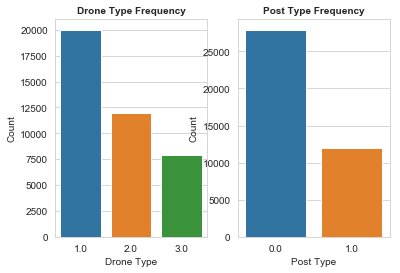

In [13]:
print("Drone Type Frequency: \n{}".format(drone_df.drone_type.value_counts()))
print()
print("Post Type Frequency: \n{}".format(drone_df.post_type.value_counts()))

fig, ax = plt.subplots(1, 2)
_ = sns.countplot(
    x = "drone_type",
    data = drone_df[
        (drone_df.drone_type.isnull() == False)
    ],
    ax = ax[0]
)

_ = sns.countplot(
    x = "post_type",
    data = drone_df[
        (drone_df.post_type.isnull() == False)
    ],
    ax = ax[1]
)

_ = ax[0].set_xlabel("Drone Type")
_ = ax[0].set_ylabel("Count")
_ = ax[0].set_title("Drone Type Frequency")

_ = ax[1].set_xlabel("Post Type")
_ = ax[1].set_ylabel("Count")
_ = ax[1].set_title("Post Type Frequency")

__Observation:__
Both the `drone_type` and `post_type` appear to be skewed towards the right, indicating the population contains more drones from type 1 and the posts are majorly labeled under type 0

Checking the distribution for `package_weight` for any anomalies.

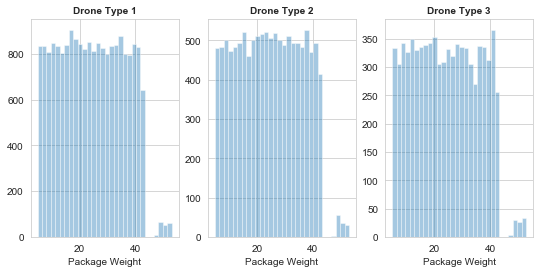

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (9,4))

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 1)
    ].package_weight,
    kde = False,
    bins = 30,
    ax = ax[0],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 2)
    ].package_weight,
    kde = False,
    bins = 30,
    ax = ax[1],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 3)
    ].package_weight,
    kde = False,
    bins = 30,
    ax = ax[2],
)

for index, axes in enumerate(ax):
    axes_title = "Drone Type " + str(index + 1)
    _ = axes.set_xlabel("Package Weight")
    _ = axes.set_title(axes_title)

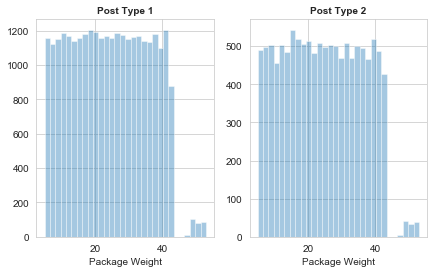

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (7,4))

_ = sns.distplot(
    a = drone_df[
        (drone_df.post_type.isnull() == False) & 
        (drone_df.post_type == 0)
    ].package_weight,
    kde = False,
    bins = 30,
    ax = ax[0],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.post_type.isnull() == False) & 
        (drone_df.post_type == 1)
    ].package_weight,
    kde = False,
    bins = 30,
    ax = ax[1],
)

for index, axes in enumerate(ax):
    axes_title = "Post Type " + str(index + 1)
    _ = axes.set_xlabel("Package Weight")
    _ = axes.set_title(axes_title)

__Observation:__
The distribution for `package_weight` is uniform for most of the data except for the few data points which form the cluster having Package Weight greater than ~45

Checking for relations between `drone_type` and `package_weight`

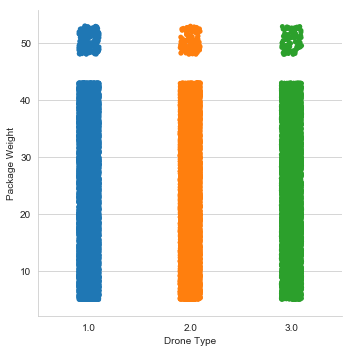

In [16]:
g = sns.catplot(
    x = "drone_type",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type.isnull() == False)
    ],
    height = 5,
    aspect = 1
)

_ = g.set_xlabels("Drone Type")
_ = g.set_ylabels("Package Weight")

__Observation:__
Nothing much to differentiate between the drone types when it comes to package weight. Just the abnormal package weight points which also seem to be uniformly distributed among the 3 drone types.

Checking for relations between `post_type` and `package_weight`

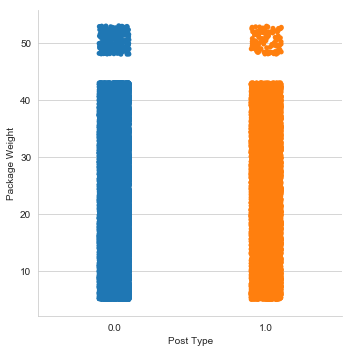

In [17]:
g = sns.catplot(
    x = "post_type",
    y = "package_weight",
    data = drone_df[
        (drone_df.post_type.isnull() == False)
    ],
    height = 5,
    aspect = 1
)

_ = g.set_xlabels("Post Type")
_ = g.set_ylabels("Package Weight")

Again nothing much to differentiate among the two categories

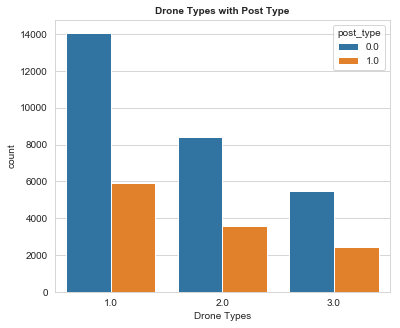

In [18]:
_ = plt.figure(figsize = (6,5))
ax = plt.gca()
_ = sns.countplot(
    x = "drone_type",
    hue = "post_type",
    data = drone_df[
        (drone_df.drone_type.isnull() == False) &
        (drone_df.post_type.isnull() == False)
    ],
    ax = ax
)

_ = ax.set_xlabel("Drone Types")
_ = ax.set_title("Drone Types with Post Type")

Again Post Type and Drone Type seem to be equally distributed

Checking the Drone Type with the `journey_distance`, for each drone and post type separately.

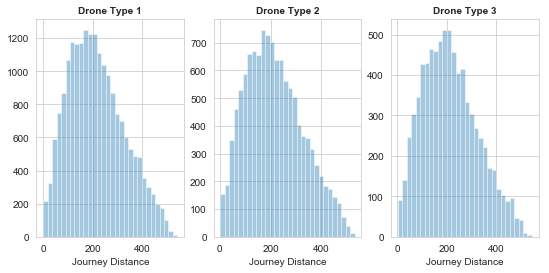

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (9,4))

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 1)
    ].journey_distance,
    kde = False,
    bins = 30,
    ax = ax[0],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 2)
    ].journey_distance,
    kde = False,
    bins = 30,
    ax = ax[1],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.drone_type.isnull() == False) & 
        (drone_df.drone_type == 3)
    ].journey_distance,
    kde = False,
    bins = 30,
    ax = ax[2],
)

for index, axes in enumerate(ax):
    axes_title = "Drone Type " + str(index + 1)
    _ = axes.set_xlabel("Journey Distance")
    _ = axes.set_title(axes_title)

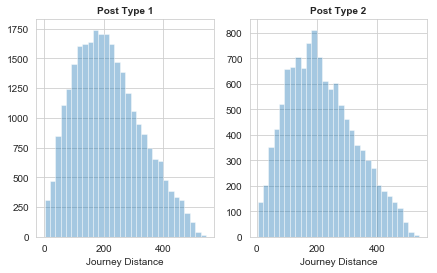

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (7,4))

_ = sns.distplot(
    a = drone_df[
        (drone_df.post_type.isnull() == False) & 
        (drone_df.post_type == 0)
    ].journey_distance,
    kde = False,
    bins = 30,
    ax = ax[0],
)

_ = sns.distplot(
    a = drone_df[
        (drone_df.post_type.isnull() == False) & 
        (drone_df.post_type == 1)
    ].journey_distance,
    kde = False,
    bins = 30,
    ax = ax[1],
)

for index, axes in enumerate(ax):
    axes_title = "Post Type " + str(index + 1)
    _ = axes.set_xlabel("Journey Distance")
    _ = axes.set_title(axes_title)

__Observation:__
`journey_distance` can be approximated to be normally distributed (a bit skewed towards the right) for each drone and post type, which might be used in finding outliers using the formula 
$$
\mu \pm 3\sigma
$$
where 

$\mu$ = Mean/Median

$\sigma$ = Standard Deviation

Checking for outliers in journey distance

In [21]:
grouped_df = drone_df.groupby(by = "drone_type")
journey_distance_median = grouped_df.journey_distance.median()
journey_distance_sd = grouped_df.journey_distance.std()

__For Drone Type 1:__

In [22]:
outlier_rows = drone_df[drone_df.drone_type == 1][
    (drone_df.journey_distance < (journey_distance_median.iloc[0] - (3 * journey_distance_sd.iloc[0]))) & 
    (drone_df.journey_distance > (journey_distance_median.iloc[0] + (3 * journey_distance_sd.iloc[0])))
].shape[0]

print("Possible Outliers in Drone Type 1 - for Journey Distance: {}".format(outlier_rows))

Possible Outliers in Drone Type 1 - for Journey Distance: 0


__For Drone Type 2:__

In [23]:
outlier_rows = drone_df[drone_df.drone_type == 2][
    (drone_df.journey_distance < (journey_distance_median.iloc[1] - (3 * journey_distance_sd.iloc[1]))) & 
    (drone_df.journey_distance > (journey_distance_median.iloc[1] + (3 * journey_distance_sd.iloc[1])))
].shape[0]

print("Possible Outliers in Drone Type 2 - for Journey Distance: {}".format(outlier_rows))

Possible Outliers in Drone Type 2 - for Journey Distance: 0


__For Drone Type 3:__

In [24]:
outlier_rows = drone_df[drone_df.drone_type == 3][
    (drone_df.journey_distance < (journey_distance_median.iloc[2] - (3 * journey_distance_sd.iloc[2]))) & 
    (drone_df.journey_distance > (journey_distance_median.iloc[2] + (3 * journey_distance_sd.iloc[2])))
].shape[0]

print("Possible Outliers in Drone Type 3 - for Journey Distance: {}".format(outlier_rows))

Possible Outliers in Drone Type 3 - for Journey Distance: 0


Initial analysis didn't return any outliers for journey distance.

__Hypothesis:__
Previously it was discovered that there are a few `package_weights` which are not uniform and deviate from the others. Checking if `package_weight` and `journey_distance` are linearly related or not

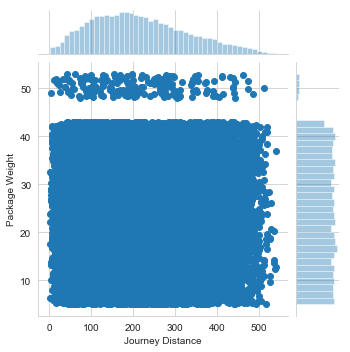

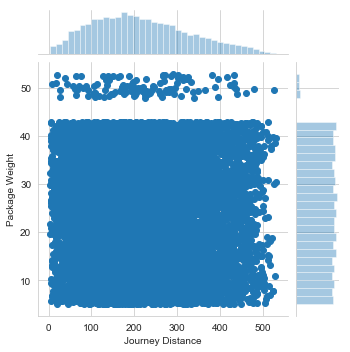

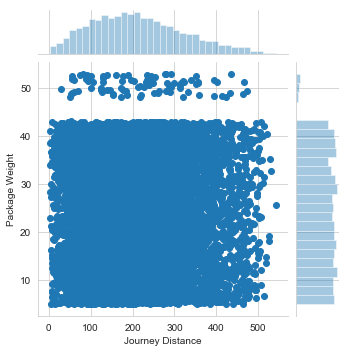

In [25]:
g = sns.jointplot(
    x = "journey_distance",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 1)
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Package Weight")

g = sns.jointplot(
    x = "journey_distance",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 2)
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Package Weight")

g = sns.jointplot(
    x = "journey_distance",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 3)
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Package Weight")

__Observation:__ Overweight values for `package_weight` are also uniformly distributed with `journey_distance` 

Checking `package_weight` with each `post_type`

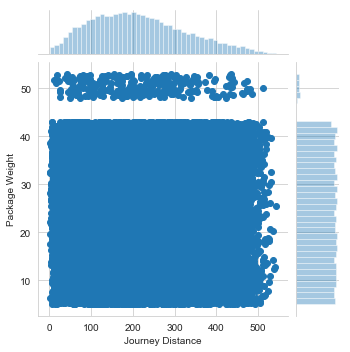

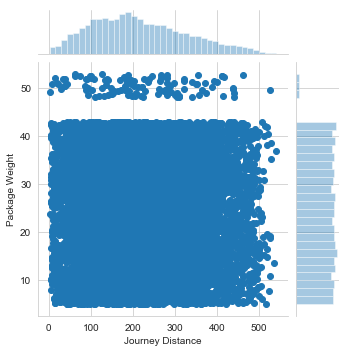

In [26]:
g = sns.jointplot(
    x = "journey_distance",
    y = "package_weight",
    data = drone_df[
        (drone_df.post_type == 0)
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Package Weight")

g = sns.jointplot(
    x = "journey_distance",
    y = "package_weight",
    data = drone_df[
        (drone_df.post_type == 1)
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Package Weight")

Checking for relations between package weight and `travel_time`, for each Drone Type

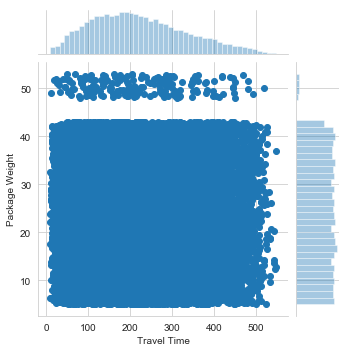

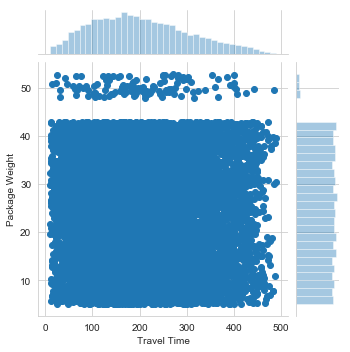

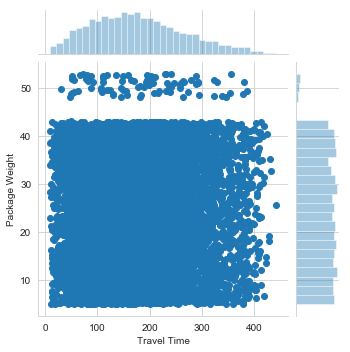

In [27]:
g = sns.jointplot(
    x = "travel_time",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 1)
    ],
    height = 5
)

_ = g.set_axis_labels("Travel Time", "Package Weight")

g = sns.jointplot(
    x = "travel_time",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 2)
    ],
    height = 5
)

_ = g.set_axis_labels("Travel Time", "Package Weight")

g = sns.jointplot(
    x = "travel_time",
    y = "package_weight",
    data = drone_df[
        (drone_df.drone_type == 3)
    ],
    height = 5
)

_ = g.set_axis_labels("Travel Time", "Package Weight")

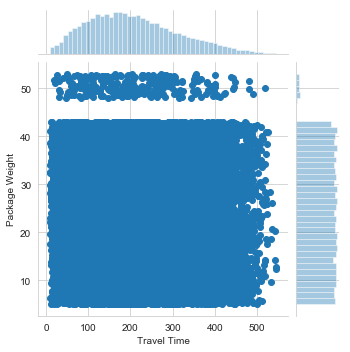

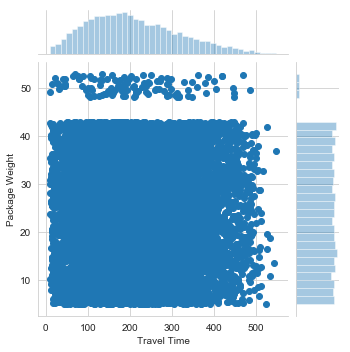

In [28]:
g = sns.jointplot(
    x = "travel_time",
    y = "package_weight",
    data = drone_df[
        (drone_df.post_type == 0)
    ],
    height = 5
)

_ = g.set_axis_labels("Travel Time", "Package Weight")

g = sns.jointplot(
    x = "travel_time",
    y = "package_weight",
    data = drone_df[
        (drone_df.post_type == 1)
    ],
    height = 5
)

_ = g.set_axis_labels("Travel Time", "Package Weight")

__Observation:__ No special relationships seem to pop out from the plots, package weight is uniformly distributed across `journey_distance`, `travel_time` for each Drone and Post Type

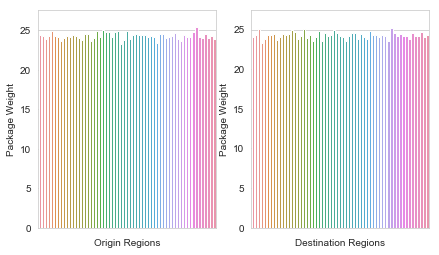

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (7,4))

_ = sns.barplot(
    y = "package_weight",
    x = "origin_region",
    data = drone_df,
    errwidth = 0,
    ax = ax[0]
)

_ = sns.barplot(
    y = "package_weight",
    x = "destination_region",
    data = drone_df,
    errwidth = 0,
    ax = ax[1]
)

_ = ax[0].set_xticklabels([])
_ = ax[0].set_xlabel("Origin Regions")
_ = ax[0].set_ylabel("Package Weight")

_ = ax[1].set_xticklabels([])
_ = ax[1].set_xlabel("Destination Regions")
_ = ax[1].set_ylabel("Package Weight")

__Observation:__ 
`package_weight` are uniformly distributed across Origin Regions and Destination Regions

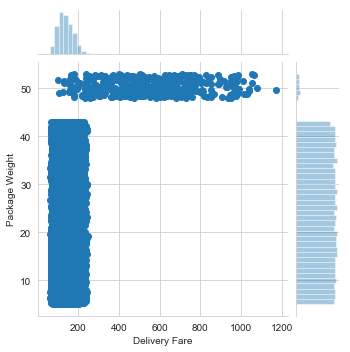

In [30]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "package_weight",
    data = drone_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Package Weight")

__Observation:__ There is a peculiar relationship between `delivery_fare` and `package_weight`. For `package_weights` less than ~45 the `delivery_fare` ranges between 0 and ~250. However for `package_weights` greater than ~45 have `delivery_fare` values uniformly distributed. The upper patch could be considered as __outliers__ during analysis, since they show properties varied from the majority of the population.

Splitting the dataframe to zoom in on the two regions and monitor the distribution.

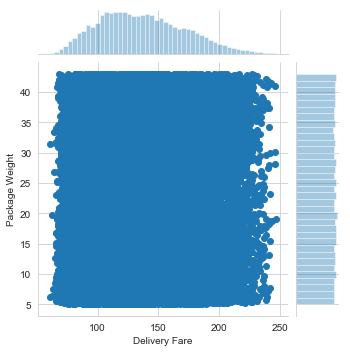

In [31]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "package_weight",
    data = drone_df[
        (drone_df.package_weight < 45)
    ],
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Package Weight")

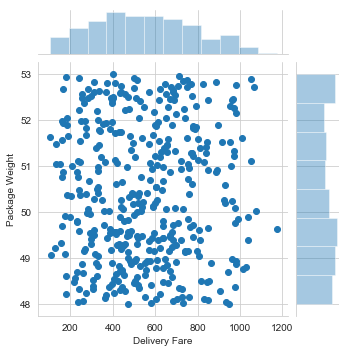

In [32]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "package_weight",
    data = drone_df[
        (drone_df.package_weight > 45)
    ],
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Package Weight")

Apart from the anomalous behaviour around `package_weight` ~45, the data is distributed uniformly in each section.

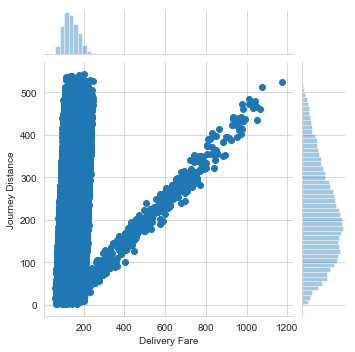

In [33]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "journey_distance",
    data = drone_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Journey Distance")

__Observation:__ There are two linear relations which can be deciphered between `journey_distance` and `delivery_fare`. The one with the higher slope is more denser than the smaller slope line. Indicating presence of an anomaly between `journey_distance` and `delivery_fare`

__Hypothesis__: The two linear relationships can be checked across `package_weight` to check if it can be differentiated

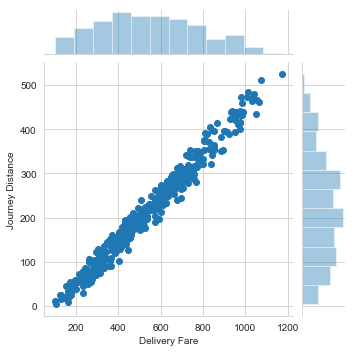

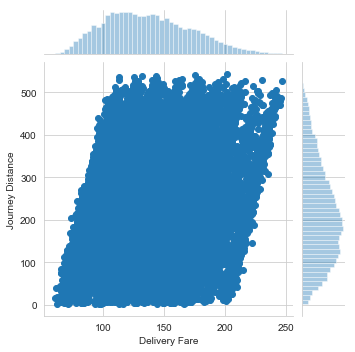

In [34]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "journey_distance",
    data = drone_df[drone_df.package_weight > 45],
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Journey Distance")

g = sns.jointplot(
    x = "delivery_fare",
    y = "journey_distance",
    data = drone_df[drone_df.package_weight < 45],
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Journey Distance")

__Observation:__ The hypothesis can be validated from the plot, that the two linear relations for `journey_distance` change for the threshold value of `package_weight`

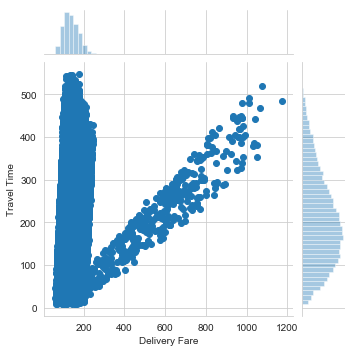

In [35]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "travel_time",
    data = drone_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Travel Time")

Similar observations can be made about `travel_time` and `delivery_fare`. Indicating variation in behaviour of `delivery_fare` from the expected in comparison with both `journey_distance` and `travel_time`.

Comparing the relationship between `journey_distance` and `travel_time` .

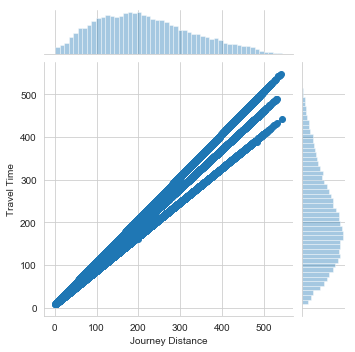

In [36]:
g = sns.jointplot(
    x = "journey_distance",
    y = "travel_time",
    data = drone_df,
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Travel Time")

__Observation:__ There are 3 different linear relations between `journey_distance` and `travel_time`. A logical conclusion would be the 3 different lines indicate the 3 Drone Types. Thus plotting the same plot for different drone types. This plot helps in understanding that the 3 drones have different __Speeds__ which could be used to fill the missing `drone_type` values in the dataset.

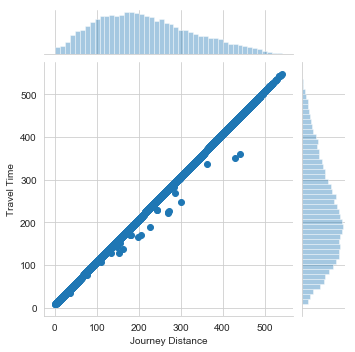

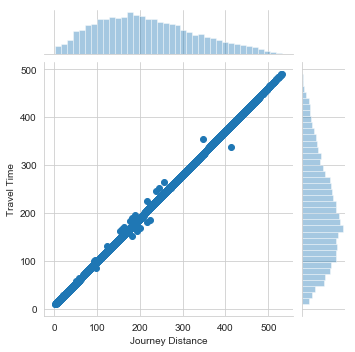

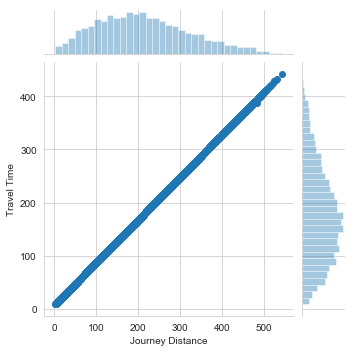

In [37]:
g = sns.jointplot(
    x = "journey_distance",
    y = "travel_time",
    data = drone_df[
        drone_df.drone_type == 1
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Travel Time")

g = sns.jointplot(
    x = "journey_distance",
    y = "travel_time",
    data = drone_df[
        drone_df.drone_type == 2
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Travel Time")

g = sns.jointplot(
    x = "journey_distance",
    y = "travel_time",
    data = drone_df[
        drone_df.drone_type == 3
    ],
    height = 5
)

_ = g.set_axis_labels("Journey Distance", "Travel Time")

A Linear relation can be established between `journey_distance` and `travel_time` except for a few data points which deviate away from the line in case of Drone Type 1 and 2. This might result in different __Speed__ values being generated. 

Although for each drone type the __Speed__ must be the same. However according to the previous plot there are different speed values which have been generated. However it must be taken into consideration that for each drone there are 3 different speeds:
1. speed during takeOff
2. speed during onRoute
3. speed during landing

Thus a simple $\frac{journey\_distance}{time\_interval}$ would not give the correct answer

Thus to calculate the speed, the following equation must be used
$$
\begin{align}
5x + 5y + [time\_interval_{i} - 10]z &= journey\_distance_{i}
\end{align}
$$

Moving towards checking relations between latitudes and longitudes.

Plotting `origin_latitude` and `origin_longitude` with respect to `origin_region` to check the clusters

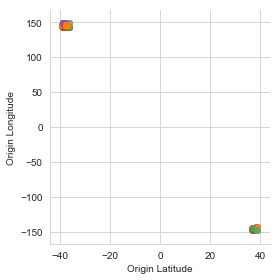

In [38]:
g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    hue = "origin_region",
    data = drone_df,
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 4
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

__Observation:__ There are some invalid coordinates because of which the two mini clusters have been formed. Splitting the dataset into two, to zoom in on the two clusters.

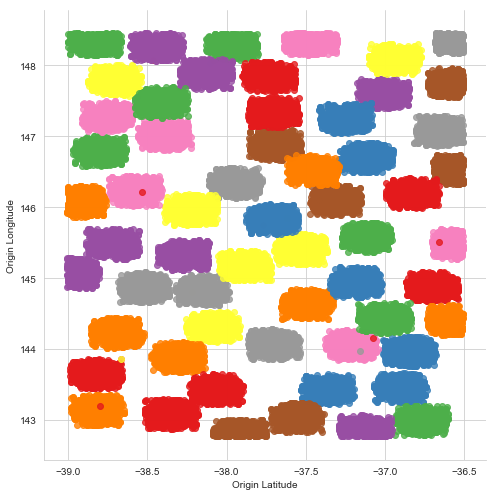

In [39]:
g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    hue = "origin_region",
    data = drone_df[
        (drone_df.origin_latitude < -20) &
        (drone_df.origin_longitude > 100) 
    ],
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 7
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

__Observation:__ There are some invalid regions which have been marked incorrectly which is evident from the plot above.

Plotting the remaining points from the second cluster.

The number of points which have been misplaced are: 20


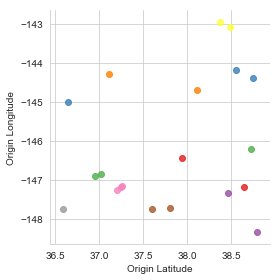

In [40]:
temp = drone_df[
    (drone_df.origin_latitude > 20) &
    (drone_df.origin_longitude < -100)
]
print("The number of points which have been misplaced are: {}".format(temp.shape[0]))

g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    hue = "origin_region",
    data = temp,
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 4
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

__Observation:__ The points seem to be uniformly distributed. However a unique observation is that the points in the two clusters are inverted across the origin. Thus a possible conversion would be to reverse the sign for the origin latitude and origin longitude for the invalid cluster.

Check the distribution of `origin_latitude` and `origin_longitude` across all `origin_regions`, to find the invalid points.

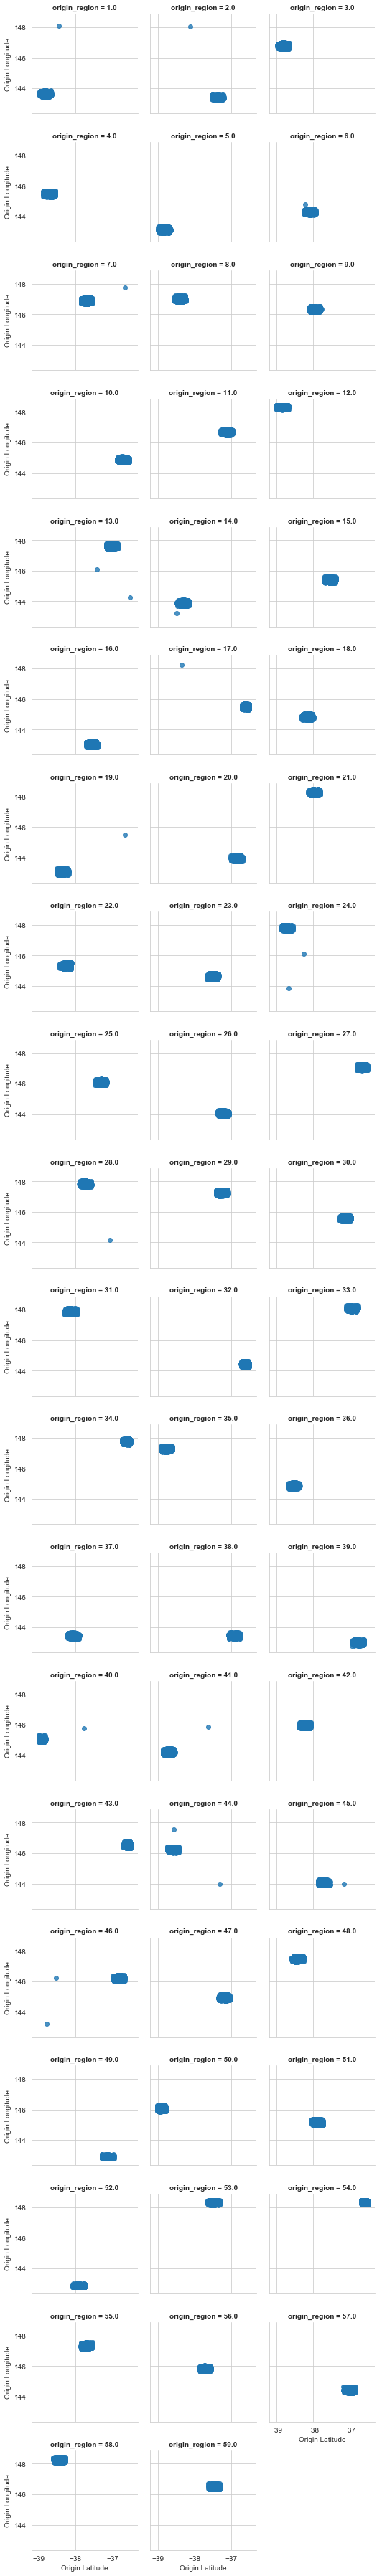

In [41]:
g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    col = "origin_region",
    col_wrap = 3,
    data = drone_df[
        (drone_df.origin_latitude < -20) &
        (drone_df.origin_longitude > 100)
    ],
    fit_reg = False,
    legend = False,
    height = 2.5
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

__Observation:__ From counting the points, it is evident there are `19` points which show anomalous behaviour. 

Plotting similar plots for `destination_latitude`, `destination_longitude` and `destination_region`.

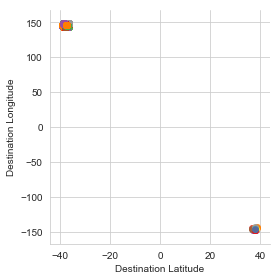

In [42]:
g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    hue = "destination_region",
    data = drone_df,
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 4
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

Splitting the clusters into two categories, to analyze the regions.

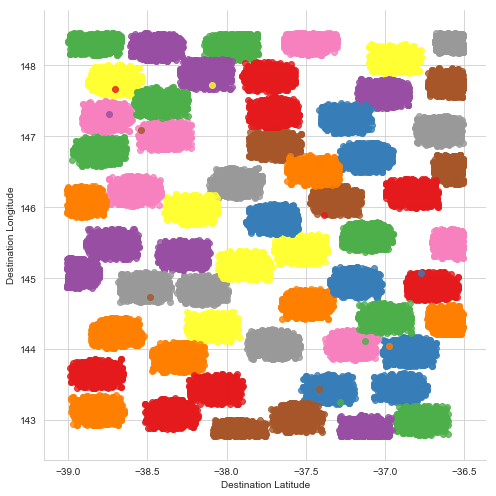

In [43]:
g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    hue = "destination_region",
    data = drone_df[
        (drone_df.destination_latitude < -20) &
        (drone_df.destination_longitude > 100) 
    ],
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 7
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

Similar to `origin_region` there are `destination_region` which are misplaced.

Plotting the remaining points in the second cluster.temp = drone_df[
    (drone_df.origin_latitude > 20) &
    (drone_df.origin_longitude < -100)
]
print("The number of points which have been misplaced are: {}".format(temp.shape[0]))

g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    hue = "origin_region",
    data = temp,
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 4
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

The number of points which have been misplaced are: 20


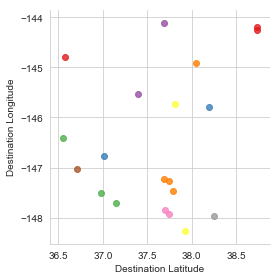

In [44]:
temp = drone_df[
    (drone_df.destination_latitude > 20) &
    (drone_df.destination_longitude < -100)
]
print("The number of points which have been misplaced are: {}".format(temp.shape[0]))

g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    hue = "destination_region",
    data = temp,
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 4
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

Similar to `origin_latitude` and `origin_longitude`, the `destination_latitude` and `destination_longitude` are inverted across the origin. Thus the possible conversion is to reverse the sign of the invalid points.

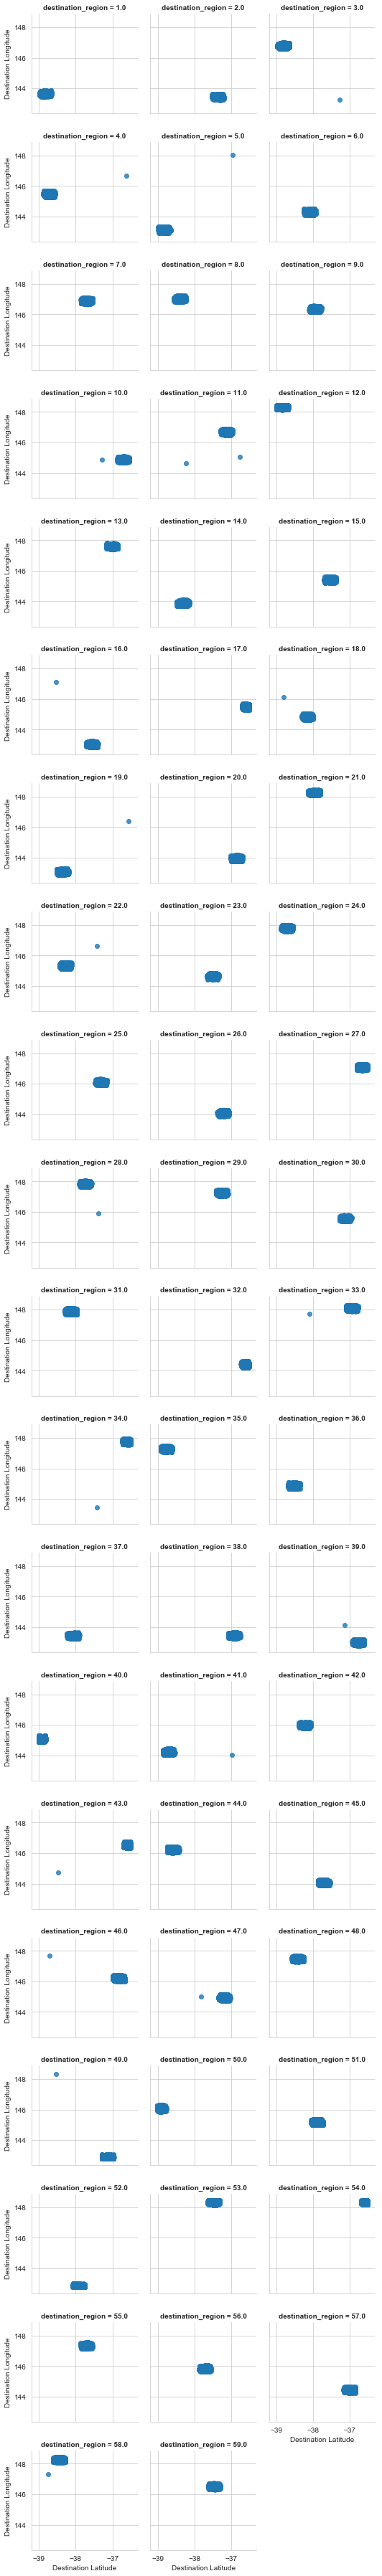

In [45]:
g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    col = "destination_region",
    col_wrap = 3,
    data = drone_df[
        (drone_df.destination_latitude < -20) &
        (drone_df.destination_longitude > 100)
    ],
    fit_reg = False,
    legend = False,
    height = 2.5
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

__Observation:__ From counting the points, it is evident there are `20` points which show anomalous behaviour. 

Checking for invalid date formats

In [46]:
def check_datetime(date):
    try:
        datetime_object = datetime.strptime(date, "%Y-%m-%d")
    except ValueError as e:
        print("Invalid Date Format: {}".format(date))

In [47]:
_ = drone_df.departure_date.apply(lambda x: check_datetime(x))

Invalid Date Format: 2018-27-04
Invalid Date Format: 2018-14-04
Invalid Date Format: 2018-19-02
Invalid Date Format: 2018-16-03
Invalid Date Format: 2018-19-01
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-28-06
Invalid Date Format: 2018-25-02
Invalid Date Format: 2018-16-06
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-24-04
Invalid Date Format: 2018-28-06
Invalid Date Format: 2018-19-01
Invalid Date Format: 2018-19-03
Invalid Date Format: 2018-19-03
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-04-31
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-02-30
Invalid Date Format: 2018-06-31
Invalid Date Format: 2018-20-06
Invalid Date Format: 2018-21-07
Invalid Date Format: 2018-27-03
Invalid Date Format: 2018-18-06
Invalid 

__Observation:__ Thus, there are invalid dates which need to be corrected.

Checking for Post Type relations

In [48]:
drone_df[
    drone_df.post_type == 1
].head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   
7  ID5139808125         2.0        1.0          15.432           12.0   
9  ID5371119422         2.0        1.0          10.629           35.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
4                52.0       -38.945068        144.995715   
7                 9.0       -38.898973        148.235146   
9                55.0       -38.804752        147.367489   

   destination_latitude  destination_longitude  journey_distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
4            -37.816453             142.782201           230.407   
7            -38.050189             146.284672           194.469   
9            -37.571704             147.255737           137.607   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-01-20       18:50:46       189.05      21:59:49         137.29  
1     2018-06-01       00:13:04       188.27       3:21:20         179.82  
4     2018-03-23       02:02:46       216.51       5:39:16         183.10  
7     2018-01-10       00:42:13       183.84       3:46:03         186.95  
9     2018-01-10       09:17:40       132.14      11:29:48         144.56

In [49]:
drone_df[
    drone_df.post_type == 0
].head()

id  drone_type  post_type  package_weight  origin_region  \
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
5  ID1857430090         1.0        0.0          20.756            7.0   
6  ID1803119156         1.0        0.0          23.127           21.0   
8  ID1915340406         3.0        0.0          35.008           35.0   

   destination_region  origin_latitude  origin_longitude  \
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
5                10.0       -37.638088        146.875961   
6                12.0       -37.803864        148.155662   
8                47.0       -38.618564        147.240592   

   destination_latitude  destination_longitude  journey_distance  \
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
5            -36.836615             144.824822           202.486   
6            -38.815374             148.448069           115.459   
8            -37.158335             145.013275           254.368   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
2     2018-02-17       16:47:43        71.06      17:58:46         126.62  
3     2018-06-14       16:43:06       334.68      22:17:46         151.34  
5     2018-02-19       09:40:17       209.57      13:09:51          83.66  
6     2018-07-11       05:00:07       122.54       7:02:39         106.47  
8     2018-02-06       14:01:54       210.69      17:32:35         177.31

__Observation:__ It is evident from the two dataframe sections that the `post_type` and `id` have a relation i.e. 
- Post Type = 0, when `id` begins with 1
- Post Type = 1, when `id` begins with 5

Checking the validity of `delivery_time` and `departure_time`.

In [50]:
def check_time(time_format):
    try:
        time_object = datetime.strptime(time_format, "%H:%M:%S")
    except ValueError as e:
        print("Invalid Time Format: {}".format(time_format))

In [51]:
_ = drone_df.departure_time.apply(lambda x: check_time(x))

In [52]:
_ = drone_df.delivery_time.apply(lambda x: check_time(x))

The format of time values for `departure` and `delivery` are correct.

## 7. Conclusions and Observations after Exploratory Data Analysis

1. __id__:
    - ID's should be unique, hence possible test could be to check for duplicate values.
    - Missing values present, and can be fixed by using the duplicate rows if present, else must be removed from the dataframe

2. __drone_type__:
    - Missing values present.
    - Dependent on the speed of the drone.
    - Possible presence of invalid drone types, which can be corrected by calculating the drone speed.

3. __post_type__:
    - Missing values present.
    - Dependent on the unique id.

4. __package_weight__:
    - Outlier poitns for package weight > 45
    
5. __origin_region__:
    - Missing values present
    - Origin Regions marked incorrectly.
    - Can be fixed by matching the origin latitude and longitude for the given region.

6. __destination_region__:
    - Missing values present
    - Destination Regions marked incorrectly.
    - Can be fixed by matching the destination latitude and longitude for the given region.

7. __origin_latitude__:
    - Incorrect values present.
    - Can be fixed by simple change of sign, since the latitude is transposed along the origin axis.

8. __origin_longitude__:
    - Incorrect values present.
    - Can be fixed by simple change of sign, since the longitude is transposed along the origin axis.

9. __destination_latitude__:
    - Incorrect values present.
    - Can be fixed by simple change of sign, since the latitude is transposed along the origin axis.

10. __destination_longitude__:
    - Incorrect values present.
    - Can be fixed by simple change of sign, since the longitude is transposed along the origin axis.

11. __journey_distance__:
    - Calculated using the formula mentioned in the analysis.
    - Incorrect values can be corrected using the formula.
    - Linear Relationship between distance and time for different drone types.

12. __departure_date__:
    - Incorrect date format. Can be fixed by converting the invalid dates into valid ones using datetime objects.

13. __departure_time__:
    - Assumption being made that the departure time is correct.
    
14. __travel_time__:
    - Null values present.
    - Calculated using the speed of the drone and the journey distance. Using the formula mentioned in the analysis.
    - Incorrect values changed accordingly.

15. __delivery_time__:
    - Can be derived from the departure time by adding travel time with departure time.
    - Valid assumption since travel time is being calculated using speed and journey distance which are correct features.

16. __delivery_fare__:
    - Linear relation between distance, time and Drone Type.
    - Consider points above package_weight ~45 to be outliers and must be excluded from the analysis, which can be considered as the threshold value. For values below 45 a different model must be used and values above 45 a different model must be used.
    - Other features having relations might be uncovered using the correlation coefficient values after the cleaning stage.

## Part 2 - Data Cleansing

## 8. Cleaning Data based on EDA

### ID

In [53]:
drone_df.isnull().sum()

id                       20
drone_type               10
post_type                20
package_weight            0
origin_region            10
destination_region       10
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

Finding the duplicate rows present in the dataframe, and splitting into two dataframes of duplicated rows and valid rows.

In [54]:
col = list(drone_df.columns.values)
col.remove("id")

duplicate_df = drone_df[drone_df.duplicated(subset=col, keep = False)]

In [55]:
duplicate_df.head()

id  drone_type  post_type  package_weight  origin_region  \
153   ID1602465694         1.0        0.0          17.749           33.0   
778   ID5190824221         2.0        1.0          41.136           45.0   
1971  ID5169715521         2.0        1.0          12.540           52.0   
2015  ID1160602880         1.0        0.0           7.134            3.0   
2197  ID1619413166         1.0        0.0           7.475           23.0   

      destination_region  origin_latitude  origin_longitude  \
153                 19.0       -36.857102        147.935906   
778                 18.0       -37.623708        143.968047   
1971                35.0       -37.923995        142.860736   
2015                 9.0       -38.759680        146.731826   
2197                18.0       -37.487776        144.672411   

      destination_latitude  destination_longitude  journey_distance  \
153             -38.287065             143.190066           447.884   
778             -38.166163             144.725018            89.821   
1971            -38.698384             147.374535           403.527   
2015            -37.819577             146.476432           107.002   
2197            -38.086306             145.001543            72.646   

     departure_date departure_time  travel_time delivery_time  delivery_fare  
153      2018-07-24       02:03:08       454.97       9:38:06         136.04  
778      2018-07-25       00:39:05        88.70       2:07:47         175.70  
1971     2018-01-23       18:29:14       373.89       0:43:07         183.04  
2015     2018-02-02       19:14:45       114.09      21:08:50          89.97  
2197     2018-02-26       13:24:19        79.73      14:44:02          84.60

Checking ID values after sorting the package weight

In [56]:
duplicate_df.sort_values("package_weight").head()

id  drone_type  post_type  package_weight  origin_region  \
39863  ID1529655271         1.0        0.0           6.101           37.0   
5452   ID1529655271         1.0        0.0           6.101           37.0   
39886           NaN         1.0        0.0           6.139           46.0   
23328  ID1888228714         1.0        0.0           6.139           46.0   
20667  ID1717426940         1.0        0.0           6.584           15.0   

       destination_region  origin_latitude  origin_longitude  \
39863                38.0       -38.072264        143.408122   
5452                 38.0       -38.072264        143.408122   
39886                12.0       -36.951067        146.381208   
23328                12.0       -36.951067        146.381208   
20667                 6.0       -37.489089        145.294057   

       destination_latitude  destination_longitude  journey_distance  \
39863            -37.028732             143.362488           116.233   
5452             -37.028732             143.362488           116.233   
39886            -38.811240             148.292485           266.588   
23328            -38.811240             148.292485           266.588   
20667            -38.102020             144.136902           122.538   

      departure_date departure_time  travel_time delivery_time  delivery_fare  
39863     2018-05-15       12:33:31       123.32      14:36:50          91.30  
5452      2018-05-15       12:33:31       123.32      14:36:50          91.30  
39886     2018-01-19       14:40:10       273.67      19:13:50         104.77  
23328     2018-01-19       14:40:10       273.67      19:13:50         104.77  
20667     2018-05-05       14:18:48       129.62      16:28:25          91.16

Creating two dataframes for duplicates and non duplicates

In [57]:
duplicate_index = duplicate_df.index
valid_index = pd.Int64Index(np.arange(len(drone_df))).difference(duplicate_index)
valid_df = drone_df.loc[valid_index]

In [58]:
duplicate_df.id.isnull().sum()

19

In [59]:
valid_df.id.isnull().sum()

1

One value 'NA' value in id which does not have a duplicate. 

There are two ways to fix this single ID:
1. Random imputation with proper values considering Post Type
2. Remove entry from analysis, since it is only one row.

__For this assessment, the row has been removed to prevent random values being inserted into the dataset.__

In [60]:
na_index = duplicate_df[duplicate_df.id.isnull()].index

Filling missing ID by finding the duplicate row and replacing the id

In [61]:
def fillna_id(entry):
    if entry.id is np.nan:
        entry = entry.drop("id")
        for item in duplicate_df.iterrows():
            if all(entry == item[1].drop("id")):
                return item[1].id
    else:
        return entry.id

In [62]:
duplicate_df.id = duplicate_df.apply(lambda x: fillna_id(x), axis = 1)

In [63]:
duplicate_df.id.isnull().sum()

0

In [64]:
drone_df = valid_df.combine_first(duplicate_df)

In [65]:
drone_df.id.isnull().sum()

1

In [66]:
drone_df.drop(
    drone_df[drone_df.id.isnull()].index,
    inplace = True
)

In [67]:
duplicate_index = drone_df[drone_df.duplicated(subset=drone_df.columns, keep = "first")].index

drone_df.drop(
    duplicate_index,
    inplace = True
)

In [68]:
drone_df.id.isnull().sum()

0

### Origin Latitude, Longitude and Region

__Observed Anomalies:__
1. Missing Values
2. Invalid origin regions being marked in the wrong regions

Separating the dataframe into 2 parts, i.e. 
- valid dataframe: which contain the valid coordinates
- invalid dataframe: which contain the invalid coordinates

Invalid dataframe values can be fixed by changing the sign of values of latitude and longitude

In [69]:
valid_df = drone_df[
    (drone_df.origin_latitude < -20) &
    (drone_df.origin_longitude > 100) 
]

print("Number of valid rows: {}".format(valid_df.shape[0]))

invalid_df = drone_df[
    (drone_df.origin_latitude > 20) &
    (drone_df.origin_longitude < -100)
]

print("Number of invalid rows: {}".format(invalid_df.shape[0]))

Number of valid rows: 39807
Number of invalid rows: 20


In [70]:
invalid_df.origin_latitude = -invalid_df.origin_latitude
invalid_df.origin_longitude = -invalid_df.origin_longitude

Combining the valid and invalid dataframes.

In [71]:
drone_df = valid_df.combine_first(invalid_df)

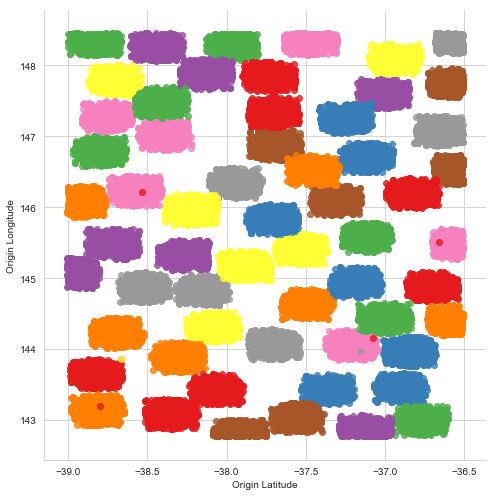

In [72]:
g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    hue = "origin_region",
    data = drone_df[
        (drone_df.origin_latitude < -20) &
        (drone_df.origin_longitude > 100) 
    ],
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 7
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

Ploting each region to check the invalid marked regions.

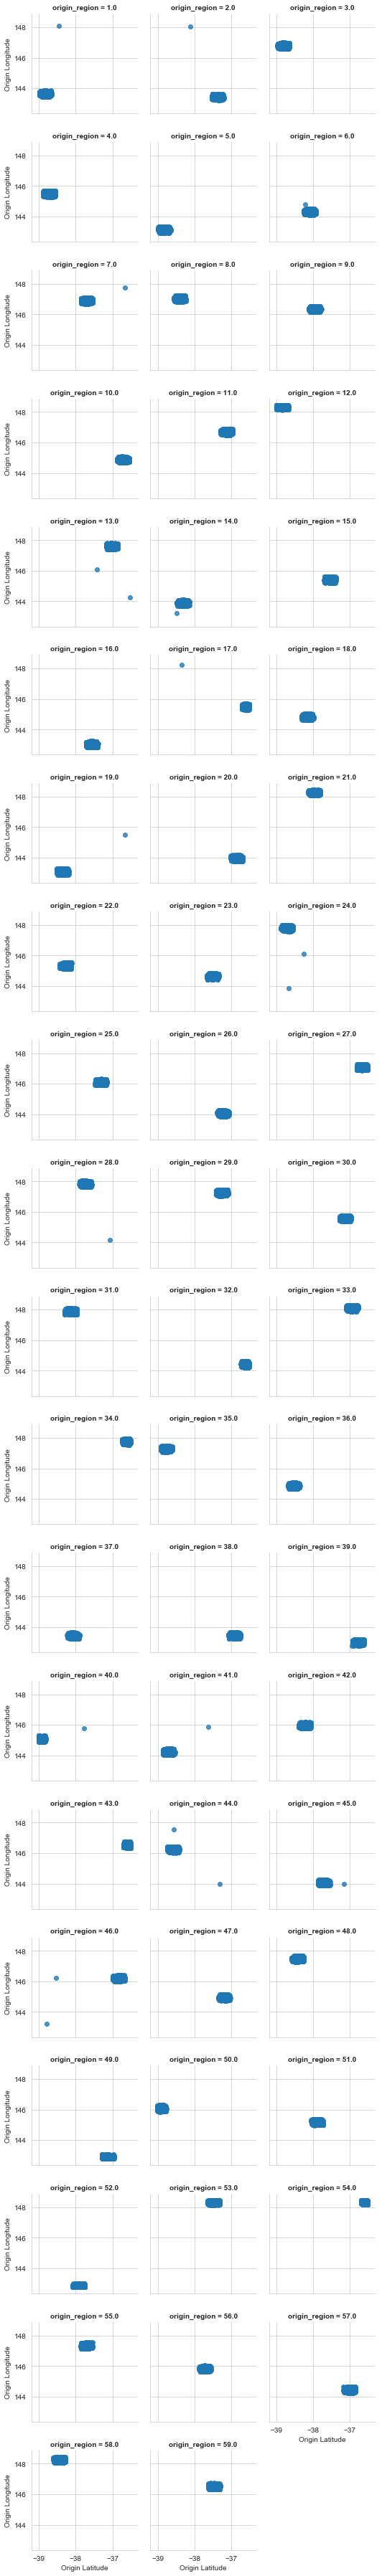

In [73]:
g = sns.lmplot(
    x = "origin_latitude",
    y = "origin_longitude",
    col = "origin_region",
    col_wrap = 3,
    data = drone_df[
        (drone_df.origin_latitude < -20) &
        (drone_df.origin_longitude > 100)
    ],
    fit_reg = False,
    legend = False,
    height = 2.5
)

_ = g.set_axis_labels("Origin Latitude", "Origin Longitude")

Since each region has a normal distribution of latitudes and longitudes, as showed in the EDA, thus using $\mu \pm 3\sigma$ to find the outliers.

In [74]:
drone_df.origin_region.fillna(0, inplace = True)
region_subset = drone_df.groupby("origin_region")
lat_med = region_subset.origin_latitude.median()
lat_sd = region_subset.origin_latitude.std()

long_med = region_subset.origin_longitude.median()
long_sd = region_subset.origin_longitude.std()

def mark_outlier(region, latitude, longitude):
    if region != 0:
        lat_lower_range = lat_med[region] - (3 * lat_sd[region])
        lat_upper_range = lat_med[region] + (3 * lat_sd[region])
        long_lower_range = long_med[region] - (3 * long_sd[region])
        long_upper_range = long_med[region] + (3 * long_sd[region])

        if (latitude > lat_lower_range and latitude < lat_upper_range) and \
           (longitude > long_lower_range and longitude < long_upper_range):
            return "V"
        return "O"
    else:
        return "N"

In [75]:
drone_df["origin"] = drone_df[
    [
        "origin_region",
        "origin_latitude",
        "origin_longitude"
    ]
].apply(lambda x: mark_outlier(x[0], x[1], x[2]), axis = 1)

Total Outlier points for mis-marked origin regions, with the distribution across regions.

In [76]:
drone_df[
    (drone_df.origin == "O")
].shape

(19, 17)

In [77]:
drone_df[
    (drone_df.origin == "O")
].origin_region.value_counts()

44.0    2
24.0    2
13.0    2
46.0    2
6.0     1
40.0    1
28.0    1
17.0    1
19.0    1
14.0    1
7.0     1
2.0     1
45.0    1
41.0    1
1.0     1
Name: origin_region, dtype: int64

Changing the invalid regions by following procedure:
1. Find the maximum and minimum latitude for the given region only including the valid regions.
2. Find the maximum and minimum longitude values.
3. Check if the origin region is marked as 0 indicating missing region. Using the latitude and latitude finding the region into which the point belongs.
4. If not an invalid point, check if the point satisfies the region boundaries, else find the appropriate region.

In [78]:
valid_group = drone_df[
    (drone_df.origin == "N") |
    (drone_df.origin == "V")
].groupby("origin_region")

lat_range = valid_group.origin_latitude.apply(lambda x: (x.min(), x.max()))
long_range = valid_group.origin_longitude.apply(lambda x: (x.min(), x.max()))

In [79]:
def change_region(region, latitude, longitude):
    if region == 0:
        for index, (lat, long) in enumerate(
            zip(lat_range, long_range)
        ):
            if (latitude >= lat[0] and latitude <= lat[1]) and \
               (longitude >= long[0] and longitude <= long[1]):
                print("Missing Region {} -> {}".format(region, index + 1.0))
                return index + 1.0
            
    if (latitude >= lat_range[region][0] and latitude <= lat_range[region][1]) and \
       (longitude >= long_range[region][0] and longitude <= long_range[region][1]):
        return region
    else:
        for index, (lat, long) in enumerate(
            zip(lat_range, long_range)
        ):
            if (latitude >= lat[0] and latitude <= lat[1]) and \
               (longitude >= long[0] and longitude <= long[1]):
                print("Invalid Region {} -> {}".format(region, index + 1.0))
                return index + 1.0

In [80]:
drone_df["origin_region"] = drone_df[
    [
        "origin_region",
        "origin_latitude",
        "origin_longitude"
    ]
].apply(lambda x: change_region(x[0], x[1], x[2]), axis = 1)

Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 1.0 -> 59.0
Invalid Region 41.0 -> 1.0
Invalid Region 45.0 -> 1.0
Invalid Region 2.0 -> 32.0
Missing Region 0.0 -> 1.0
Invalid Region 46.0 -> 1.0
Invalid Region 7.0 -> 35.0
Invalid Region 13.0 -> 1.0
Invalid Region 13.0 -> 33.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 14.0 -> 1.0
Invalid Region 24.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 44.0 -> 49.0
Invalid Region 19.0 -> 18.0
Invalid Region 46.0 -> 6.0
Invalid Region 17.0 -> 59.0
Invalid Region 28.0 -> 1.0
Invalid Region 40.0 -> 1.0
Invalid Region 44.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 24.0 -> 1.0
Invalid Region 6.0 -> 1.0


Dropping the additional column added for detecting outliers

In [81]:
drone_df.drop("origin", axis = 1, inplace = True)

Checking the null values present after performing the cleaning task.

In [82]:
drone_df.isnull().sum()

id                        0
drone_type               10
post_type                20
package_weight            0
origin_region             0
destination_region       10
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

### Destination Latitude, Longitude and Region

__Observed Anomalies:__
1. Missing Values
2. Invalid origin regions being marked in the wrong regions

Separating the dataframe into 2 parts, i.e. 
- valid dataframe: which contain the valid coordinates
- invalid dataframe: which contain the invalid coordinates

Invalid dataframe values can be fixed by changing the sign of values of latitude and longitude

In [83]:
valid_df = drone_df[
    (drone_df.destination_latitude < -20) &
    (drone_df.destination_longitude > 100) 
]

print("Number of valid rows: {}".format(valid_df.shape[0]))

invalid_df = drone_df[
    (drone_df.destination_latitude > 20) &
    (drone_df.destination_longitude < -100)
]

print("Number of invalid rows: {}".format(invalid_df.shape[0]))

Number of valid rows: 39807
Number of invalid rows: 20


In [84]:
invalid_df.destination_latitude = -invalid_df.destination_latitude
invalid_df.destination_longitude = -invalid_df.destination_longitude

Combining the valid and invalid dataframes.

In [85]:
drone_df = valid_df.combine_first(invalid_df)

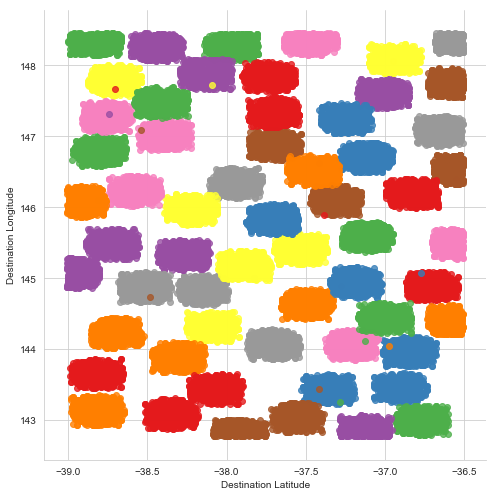

In [86]:
g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    hue = "destination_region",
    data = drone_df[
        (drone_df.destination_latitude < -20) &
        (drone_df.destination_longitude > 100) 
    ],
    fit_reg = False,
    legend = False,
    palette = "Set1",
    height = 7
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

Ploting each region to check the invalid marked regions.

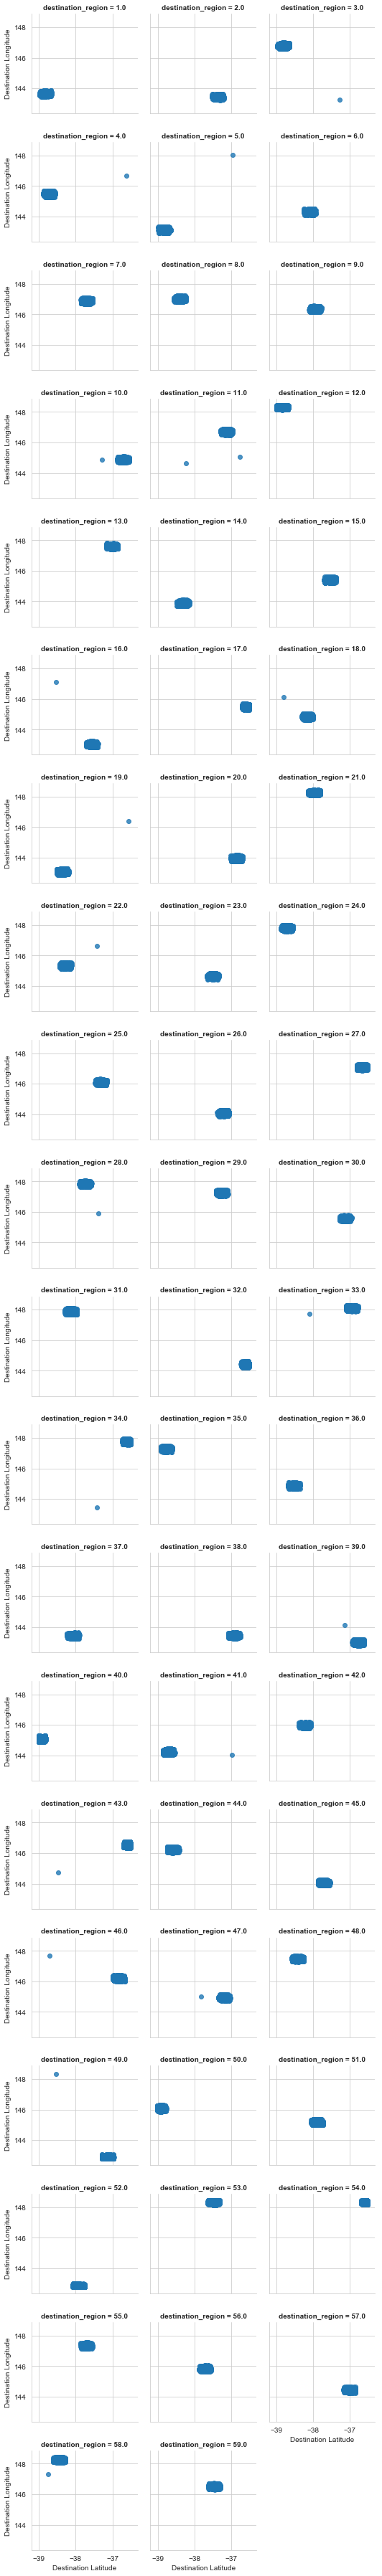

In [87]:
g = sns.lmplot(
    x = "destination_latitude",
    y = "destination_longitude",
    col = "destination_region",
    col_wrap = 3,
    data = drone_df[
        (drone_df.destination_latitude < -20) &
        (drone_df.destination_longitude > 100)
    ],
    fit_reg = False,
    legend = False,
    height = 2.5
)

_ = g.set_axis_labels("Destination Latitude", "Destination Longitude")

Since each region has a normal distribution of latitudes and longitudes, as showed in the EDA, thus using $\mu \pm 3\sigma$ to find the outliers.

In [88]:
drone_df.destination_region.fillna(0, inplace = True)
region_subset = drone_df.groupby("destination_region")
lat_med = region_subset.destination_latitude.median()
lat_sd = region_subset.destination_latitude.std()

long_med = region_subset.destination_longitude.median()
long_sd = region_subset.destination_longitude.std()

def mark_outlier(region, latitude, longitude):
    if region != 0:
        lat_lower_range = lat_med[region] - (3 * lat_sd[region])
        lat_upper_range = lat_med[region] + (3 * lat_sd[region])
        long_lower_range = long_med[region] - (3 * long_sd[region])
        long_upper_range = long_med[region] + (3 * long_sd[region])

        if (latitude > lat_lower_range and latitude < lat_upper_range) and \
           (longitude > long_lower_range and longitude < long_upper_range):
            return "V"
        return "O"
    else:
        return "N"

In [89]:
drone_df["destination"] = drone_df[
    [
        "destination_region",
        "destination_latitude",
        "destination_longitude"
    ]
].apply(lambda x: mark_outlier(x[0], x[1], x[2]), axis = 1)

Total Outlier points for mis-marked origin regions, with the distribution across regions.

In [90]:
drone_df[
    (drone_df.destination == "O")
].shape

(20, 17)

In [91]:
drone_df[
    (drone_df.destination == "O")
].destination_region.value_counts()

11.0    2
28.0    1
3.0     1
58.0    1
22.0    1
43.0    1
4.0     1
39.0    1
49.0    1
33.0    1
16.0    1
10.0    1
41.0    1
34.0    1
46.0    1
5.0     1
18.0    1
19.0    1
47.0    1
Name: destination_region, dtype: int64

Changing the invalid regions by following procedure:
1. Find the maximum and minimum latitude for the given region only including the valid regions.
2. Find the maximum and minimum longitude values.
3. Check if the destination region is marked as 0 indicating missing region. Using the latitude and latitude finding the region into which the point belongs.
4. If not an invalid point, check if the point satisfies the region boundaries, else find the appropriate region.

In [92]:
valid_group = drone_df[
    (drone_df.destination == "N") |
    (drone_df.destination == "V")
].groupby("destination_region")

lat_range = valid_group.destination_latitude.apply(lambda x: (x.min(), x.max()))
long_range = valid_group.destination_longitude.apply(lambda x: (x.min(), x.max()))

In [93]:
drone_df["destination_region"] = drone_df[
    [
        "destination_region",
        "destination_latitude",
        "destination_longitude"
    ]
].apply(lambda x: change_region(x[0], x[1], x[2]), axis = 1)

Invalid Region 11.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 3.0 -> 1.0
Invalid Region 58.0 -> 1.0
Invalid Region 22.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 43.0 -> 1.0
Invalid Region 4.0 -> 44.0
Missing Region 0.0 -> 1.0
Invalid Region 11.0 -> 1.0
Invalid Region 39.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 49.0 -> 1.0
Invalid Region 28.0 -> 1.0
Invalid Region 47.0 -> 1.0
Invalid Region 10.0 -> 1.0
Invalid Region 41.0 -> 1.0
Invalid Region 34.0 -> 1.0
Invalid Region 46.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 5.0 -> 1.0
Invalid Region 18.0 -> 1.0
Missing Region 0.0 -> 1.0
Missing Region 0.0 -> 1.0
Invalid Region 19.0 -> 44.0
Missing Region 0.0 -> 1.0
Invalid Region 16.0 -> 1.0
Invalid Region 33.0 -> 1.0


Dropping the additional column added for detecting outliers

In [94]:
drone_df.drop("destination", axis = 1, inplace = True)

Checking the null values present after performing the cleaning task.

In [95]:
drone_df.isnull().sum()

id                        0
drone_type               10
post_type                20
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

### Journey Distance

Calculated using the formula specified in the analysis.

In [96]:
def calculate_distance(origin_lat, origin_long, dest_lat, dest_long):
    RADIUS = 6378
    
    origin_lat = radians(origin_lat)
    origin_long = radians(origin_long)
    dest_lat = radians(dest_lat)
    dest_long = radians(dest_long)
    
    longitude_diff = dest_long - origin_long
    latitude_diff = dest_lat - origin_lat
    temp = sin(latitude_diff / 2) ** 2 + cos(origin_lat) * cos(dest_lat) * sin(longitude_diff / 2) ** 2
    temp = 2 * atan2(sqrt(temp), sqrt(1 - temp))
    return round((RADIUS * temp), 3)

In [97]:
drone_df["calculated_distance"] = drone_df[
    [
        "origin_latitude",
        "origin_longitude",
        "destination_latitude",
        "destination_longitude"
    ]
].apply(lambda x: calculate_distance(x[0], x[1], x[2], x[3]), axis = 1)

In [98]:
def check_distance(calculated_distance, journey_distance):
    calculated_distance = round(calculated_distance, 3)
    journey_distance = round(journey_distance, 3)
    if journey_distance == calculated_distance:
        return True
    return False

In [99]:
drone_df["valid_distance"] = drone_df[
    [
        "calculated_distance",
        "journey_distance"
    ]
].apply(lambda x: check_distance(x[0], x[1]), axis = 1)

In [100]:
drone_df[
    (drone_df.valid_distance == False)
][
    [
        "journey_distance",
        "calculated_distance"
    ]
]

journey_distance  calculated_distance
207             235.353              228.453
219             293.881              291.581
2268            112.826              112.026
5907            285.160              275.760
10455           280.816              278.916
12492           371.274              373.374
18641           198.525              193.725
24456           154.293              144.993
24787           298.515              295.415
28878            84.008               82.908
28886           272.801              268.901
30937           268.952              271.752
37076           133.263              132.763
37082           483.687              475.287
39114           130.619              124.219

Replacing the invalid values with the calculated values, and drop the extra columns that have been created for the cleaning process

In [101]:
drone_df.journey_distance = drone_df.calculated_distance
drop_cols = [
    "calculated_distance",
    "valid_distance"
]
drone_df.drop(drop_cols, axis = 1, inplace = True)

In [102]:
drone_df.head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   destination_latitude  destination_longitude  journey_distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
4            -37.816453             142.782201           230.407   

  departure_date departure_time  travel_time delivery_time  delivery_fare  
0     2018-01-20       18:50:46       189.05      21:59:49         137.29  
1     2018-06-01       00:13:04       188.27       3:21:20         179.82  
2     2018-02-17       16:47:43        71.06      17:58:46         126.62  
3     2018-06-14       16:43:06       334.68      22:17:46         151.34  
4     2018-03-23       02:02:46       216.51       5:39:16         183.10

### Post Type

According to the analysis, the Post Type is related to ID as:
- If Post Type = 1, then ID begins with 5
- else if Post Type = 0, then ID begins with 1

In [103]:
drone_df.post_type = drone_df.id.apply(lambda x: 1.0 if x[2] == "5" else 0.0)

In [104]:
drone_df.isnull().sum()

id                        0
drone_type               10
post_type                 0
package_weight            0
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time              40
delivery_time             0
delivery_fare            30
dtype: int64

### Travel Time, Speed and Drone Type

Checking for travel time and Drone Types are one of the most crucial steps in the given cleaning process.

Assumptions being made for the analysis are:
1. Departure Time does not contain invalid values both semanticaly and syntacticaly.
2. Speed of the drone is consistent across all entries.

Changing date format from `str` to `datetime`

In [105]:
def change_datetime(dateformat):
    try:
        return datetime.strptime(dateformat, "%Y-%m-%d")
    except ValueError as e:
        try:
            return datetime.strptime(dateformat, "%Y-%d-%m")
        except ValueError as e:
            datelist = dateformat.split("-")
            datelist[1] = str(int(datelist[1]) + 1)
            datelist[2] = "01"
            dateformat = "-".join(datelist)
            return datetime.strptime(dateformat, "%Y-%d-%m")

In [106]:
drone_df.departure_date = drone_df.departure_date.apply(lambda x: change_datetime(x))

To find the difference between delivery time and departure time, the datetime methods can be used to calculate the difference, although the delivery date must be set by incrementing the departure date depending on the timelines..

In [107]:
drone_df["delivery_date"] = drone_df[
    [
        "departure_date",
        "departure_time",
        "delivery_time"
    ]
].apply(
    lambda x: 
    x[0] + timedelta(days = 1)
    if x[1] > x[2]
    else
        x[0],
    axis = 1
)

Converting departure and delivery time into `time` objects, to make it easier for performing datetime arithmetics.

In [108]:
def convert_datetime(timeformat):
    return datetime.strptime(timeformat, "%H:%M:%S").time()

In [109]:
drone_df["departure_time"] = drone_df.departure_time.apply(lambda x: convert_datetime(x))

In [110]:
drone_df["delivery_time"] = drone_df.delivery_time.apply(lambda x: convert_datetime(x))

Combining the date and time fields for departure and delivery columns, to generate datetime objects with date and time.

In [111]:
drone_df["departure_details"] = drone_df[
    [
        "departure_date",
        "departure_time"
    ]
].apply(lambda x: datetime.combine(x[0], x[1]), axis = 1)

In [112]:
drone_df["delivery_details"] = drone_df[
    [
        "delivery_date",
        "delivery_time"
    ]
].apply(lambda x: datetime.combine(x[0], x[1]), axis = 1)

In [113]:
drone_df.head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   destination_latitude  destination_longitude  journey_distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
4            -37.816453             142.782201           230.407   

  departure_date departure_time  travel_time delivery_time  delivery_fare  \
0     2018-01-20       18:50:46       189.05      21:59:49         137.29   
1     2018-06-01       00:13:04       188.27      03:21:20         179.82   
2     2018-02-17       16:47:43        71.06      17:58:46         126.62   
3     2018-06-14       16:43:06       334.68      22:17:46         151.34   
4     2018-03-23       02:02:46       216.51      05:39:16         183.10   

  delivery_date   departure_details    delivery_details  
0    2018-01-20 2018-01-20 18:50:46 2018-01-20 21:59:49  
1    2018-06-01 2018-06-01 00:13:04 2018-06-01 03:21:20  
2    2018-02-17 2018-02-17 16:47:43 2018-02-17 17:58:46  
3    2018-06-14 2018-06-14 16:43:06 2018-06-14 22:17:46  
4    2018-03-23 2018-03-23 02:02:46 2018-03-23 05:39:16

Calculating the time interval using a simple $delivery\_details - departure\_details$.

Comparing the expected results with the computed result to find the valid entries, to compute the speed of the drones.

In [114]:
def find_traveltime(departure, delivery):
    hours = (((delivery - departure).seconds // 3600) * 60)
    minutes = (delivery - departure).seconds % 3600 / 60
    return round((hours + minutes), 2)

In [115]:
drone_df["calculated_time"] = drone_df[
    [
        "departure_details",
        "delivery_details"
    ]
].apply(lambda x: find_traveltime(x[0], x[1]), axis = 1)

In [116]:
drone_df.head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   destination_latitude  destination_longitude  journey_distance  \
0            -38.282841             145.900417           181.962   
1            -37.395974             146.180498           199.350   
2            -37.441415             144.754375            70.414   
3            -38.152850             144.360938           360.396   
4            -37.816453             142.782201           230.407   

  departure_date departure_time  travel_time delivery_time  delivery_fare  \
0     2018-01-20       18:50:46       189.05      21:59:49         137.29   
1     2018-06-01       00:13:04       188.27      03:21:20         179.82   
2     2018-02-17       16:47:43        71.06      17:58:46         126.62   
3     2018-06-14       16:43:06       334.68      22:17:46         151.34   
4     2018-03-23       02:02:46       216.51      05:39:16         183.10   

  delivery_date   departure_details    delivery_details  calculated_time  
0    2018-01-20 2018-01-20 18:50:46 2018-01-20 21:59:49           189.05  
1    2018-06-01 2018-06-01 00:13:04 2018-06-01 03:21:20           188.27  
2    2018-02-17 2018-02-17 16:47:43 2018-02-17 17:58:46            71.05  
3    2018-06-14 2018-06-14 16:43:06 2018-06-14 22:17:46           334.67  
4    2018-03-23 2018-03-23 02:02:46 2018-03-23 05:39:16           216.50

In [117]:
def check_traveltime(calculated_time, travel_time):
    travel_time = round(travel_time, 2)
    if (travel_time == round(calculated_time, 2)) or \
       (travel_time == round(calculated_time + 0.01, 2)) or \
       (travel_time == round(calculated_time - 0.01, 2)) or \
       (travel_time == round(calculated_time + 0.02, 2)) or \
       (travel_time == round(calculated_time - 0.02, 2)):
        return "V"
    else:
        return "O"

In [118]:
drone_df["time"] = drone_df[
    [
        "calculated_time",
        "travel_time"
    ]
].apply(lambda x: check_traveltime(x[0], x[1]), axis = 1)

The total outliers present in the travel time column are:

In [119]:
drone_df[drone_df.time == "O"].shape

(100, 21)

### Finding Drone Speeds

#### Solving using simultaneous equations for finding speed

$$
\begin{align}
x: \text{Takeoff speed} \\
y: \text{Landing speed} \\
z: \text{Enroute speed} \\
5x + 5y + (\text{travel_time}-10)z = \text{journey_distance}
\end{align}
$$

#### Drone Type 1:

Considering 2 valid entries for drone 1 and iterating over the entire group in pairs: Since speed is consistent for all drones

In [120]:
drone_1 = drone_df[
    (drone_df.drone_type == 1) &
    (drone_df.time == "V")
][
    [
        "drone_type",
        "journey_distance",
        "calculated_time",
        "travel_time"
    ]
]

In [121]:
def find_drone_speed(df):
    travel_time = df.travel_time - 10
    journey_distance = df.journey_distance
    
    speeds = []
    constants = []
    for i in range(0, df.shape[0] - 1):
        distance = abs(round(journey_distance.iloc[i] - journey_distance.iloc[i+1], 2))
        time = abs(round(travel_time.iloc[i] - travel_time.iloc[i+1], 2))
        if time > 0:
            speed = round(distance / time, 2)
            constant = round(journey_distance.iloc[i] - (speed * travel_time.iloc[i]), 2)
            speeds.append(speed)
            constants.append(constant)
            
    return max(set(speeds), key = speeds.count), max(set(constants), key = constants.count)

In [122]:
drone1_speed, drone1_constant = find_drone_speed(drone_1)

#### Drone Type 2:

In [123]:
drone_2 = drone_df[
    (drone_df.drone_type == 2) &
    (drone_df.time == "V")
][
    [
        "drone_type",
        "journey_distance",
        "calculated_time",
        "travel_time"
    ]
]

In [124]:
drone2_speed, drone2_constant = find_drone_speed(drone_2)

#### Drone Type 3:

In [125]:
drone_3 = drone_df[
    (drone_df.drone_type == 3) &
    (drone_df.time == "V")
][
    [
        "drone_type",
        "journey_distance",
        "calculated_time",
        "travel_time"
    ]
]

In [126]:
drone3_speed, drone3_constant = find_drone_speed(drone_3)

In [127]:
speeds = [
    drone1_speed,
    drone2_speed,
    drone3_speed
]

constants = [
    drone1_constant,
    drone2_constant,
    drone3_constant
]

### Fix Drone Types and Travel Time

Using the speed of the drones to calculate the `travel_time` using the `journey_distance` and `drone_type`.

Incase the travel time is incorrect validate the `travel_time` with different drone speeds, if the `travel_time` matches any other drone speed then the drone type needs to be changed. If none of the `travel_time` matches for any drone speeds replace the `travel_time` with the calculated value for the existing drone type.

All calculations are carried out with an tolerance or $\pm$ 0.01 or $\pm$ 0.02

First, fixing drone types

In [128]:
def check_otherdrones(entry, index):
    for i, (speed, constant) in enumerate(zip(speeds, constants)):
        if i != index:
            distance = entry.journey_distance
            time = round(entry.travel_time, 2)
            calculated_time = round((distance - constant) / speed + 10, 2)
            if (time == calculated_time) or \
               (time == round(calculated_time + 0.01, 2)) or \
               (time == round(calculated_time - 0.01, 2)) or \
               (time == round(calculated_time + 0.02, 2)) or \
               (time == round(calculated_time - 0.02, 2)):
                return i + 1.0
    return entry.drone_type

In [129]:
def fill_dronetypes(entry):
    drone_type = entry.drone_type
    distance = entry.journey_distance
    time = round(entry.travel_time, 2)
    
    if drone_type == 1 or drone_type == 2 or drone_type == 3:
        calculated_time = round((distance - constants[int(drone_type - 1)]) / speeds[int(drone_type - 1)] + 10, 2)
        if (time == calculated_time) or \
           (time == round(calculated_time + 0.01, 2)) or \
           (time == round(calculated_time - 0.01, 2)) or \
           (time == round(calculated_time + 0.02, 2)) or \
           (time == round(calculated_time - 0.02, 2)):
            return drone_type
        else:
            return check_otherdrones(entry, int(drone_type - 1)) 
    else:
        for i, (speed, constant) in enumerate(zip(speeds, constants)):
            calculated_time = round((distance - constant) / speed + 10, 2)
            if (time == calculated_time) or \
               (time == round(calculated_time + 0.01, 2)) or \
               (time == round(calculated_time - 0.01, 2)) or \
               (time == round(calculated_time + 0.02, 2)) or \
               (time == round(calculated_time - 0.02, 2)):
                return i + 1.0

In [130]:
drone_df.drone_type = drone_df.apply(lambda x: fill_dronetypes(x), axis = 1)

Moving on to fix travel time.

The provided `travel_time` is used in case the calculated time is equal with the given toleranve value of 0.01 or 0.02, else the calculated time is returned.

In [131]:
def check_traveltime(entry):
    drone_type = entry.drone_type
    distance = entry.journey_distance
    time = round(entry.travel_time, 2)
    
    calculated_time = round((distance - constants[int(drone_type - 1)]) / speeds[int(drone_type - 1)] + 10, 2)
    if (time == calculated_time) or \
       (time == round(calculated_time + 0.01, 2)) or \
       (time == round(calculated_time - 0.01, 2)) or \
       (time == round(calculated_time + 0.02, 2)) or \
       (time == round(calculated_time - 0.02, 2)):
        return time
    else:
        return calculated_time

In [132]:
drone_df["travel_time"] = drone_df.apply(lambda x: check_traveltime(x), axis = 1)

Fixing delivery time based on `travel_time` by adding the travel_time to `departure_time`. This is being done with the assumption that `departure_time` is correct.

Also `delivery_time` is converted back to string format to maintain the original data types

In [133]:
drone_df["delivery_time"] = drone_df[
    [
        "departure_time",
        "travel_time"
    ]
].apply(lambda x: (
        datetime.combine(
            datetime.now(), x[0]
        ) + timedelta(minutes = x[1])
    ).strftime("%H:%M:%S"), axis = 1
)

In [134]:
drone_df.head()

id  drone_type  post_type  package_weight  origin_region  \
0  ID5363844877         1.0        1.0          23.114           45.0   
1  ID5375195581         2.0        1.0          13.920           53.0   
2  ID1894838952         2.0        0.0          28.262           51.0   
3  ID1754559105         2.0        0.0          31.290           53.0   
4  ID5675066108         2.0        1.0           5.409           40.0   

   destination_region  origin_latitude  origin_longitude  \
0                42.0       -37.762742        143.933177   
1                25.0       -37.390154        148.434609   
2                23.0       -37.946250        145.236047   
3                 6.0       -37.306709        148.312545   
4                52.0       -38.945068        144.995715   

   destination_latitude  destination_longitude  ...   departure_date  \
0            -38.282841             145.900417  ...       2018-01-20   
1            -37.395974             146.180498  ...       2018-06-01   
2            -37.441415             144.754375  ...       2018-02-17   
3            -38.152850             144.360938  ...       2018-06-14   
4            -37.816453             142.782201  ...       2018-03-23   

  departure_time travel_time  delivery_time delivery_fare  delivery_date  \
0       18:50:46      189.05       21:59:49        137.29     2018-01-20   
1       00:13:04      188.27       03:21:20        179.82     2018-06-01   
2       16:47:43       71.06       17:58:46        126.62     2018-02-17   
3       16:43:06      334.68       22:17:46        151.34     2018-06-14   
4       02:02:46      216.51       05:39:16        183.10     2018-03-23   

    departure_details    delivery_details calculated_time  time  
0 2018-01-20 18:50:46 2018-01-20 21:59:49          189.05     V  
1 2018-06-01 00:13:04 2018-06-01 03:21:20          188.27     V  
2 2018-02-17 16:47:43 2018-02-17 17:58:46           71.05     V  
3 2018-06-14 16:43:06 2018-06-14 22:17:46          334.67     V  
4 2018-03-23 02:02:46 2018-03-23 05:39:16          216.50     V  

[5 rows x 21 columns]

Dropping the extra columns which were created to aid the analysis and feature cleaning purposes, and converting the datatypes back to the original type in which it was presented.

In [135]:
drop_cols = [
    "delivery_date",
    "departure_details",
    "delivery_details",
    "calculated_time",
    "time"
]

drone_df.drop(drop_cols, axis = 1, inplace = True)

In [136]:
drone_df.departure_date = drone_df.departure_date.apply(
    lambda x: x.strftime("%Y-%m-%d")
)

In [137]:
drone_df.departure_time = drone_df.departure_time.apply(
    lambda x: x.strftime("%H:%M:%S")
)

In [138]:
drone_df.dtypes

id                        object
drone_type               float64
post_type                float64
package_weight           float64
origin_region            float64
destination_region       float64
origin_latitude          float64
origin_longitude         float64
destination_latitude     float64
destination_longitude    float64
journey_distance         float64
departure_date            object
departure_time            object
travel_time              float64
delivery_time             object
delivery_fare            float64
dtype: object

### Linear Regression for Delivery Fare

Converting the departure date into 3 categorical values based on the time of the day.

In [139]:
morning_low = datetime(1990, 1, 1, hour = 6, minute = 0, second = 0).time()
morning_high = datetime(1990, 1, 1, hour = 11, minute = 59, second = 59).time()
afternoon_low = datetime(1990, 1, 1, hour = 12, minute = 0, second = 0).time()
afternoon_high = datetime(1990, 1, 1, hour = 20, minute = 59, second = 59).time()
night_low = datetime(1990, 1, 1, hour = 21, minute = 0, second = 0).time()
night_high = datetime(1990, 1, 1, hour = 5, minute = 59, second = 59).time()

def map_time_period(time):
    time = datetime.strptime(time, "%H:%M:%S").time()
    if time >= morning_low and time <= morning_high:
        return 0
    elif time >= afternoon_low and time <= afternoon_high:
        return 1
    else:
        return 2

In [140]:
drone_df["day_period"] = drone_df.departure_time.apply(lambda x: map_time_period(x))

From the EDA, it was clearly evident that for `package_weights` > ~45, there are two clusters which are formed. The upper cluster contain a less dense population indicating their presence of being as outliers. Therefore creating a new dataframe which contains filtered values to fit the linear regression model for imputing values for `delivery_fare`.

In [141]:
linear_df = drone_df[
    drone_df.package_weight < 45
]

non_linear_df = drone_df[
    drone_df.package_weight >= 45
]

In [168]:
linear_df.delivery_fare.isnull().sum(), non_linear_df.delivery_fare.isnull().sum()

(0, 0)

Since there are no null values in the dataframe for package_weight > 45, according to the analysis done, there is no need for the second linear model. A single linear model is sufficient for identifying the missing values

Performing some analysis on distance and time columns to check if the properties seen during the EDA process are still being maintained or not.

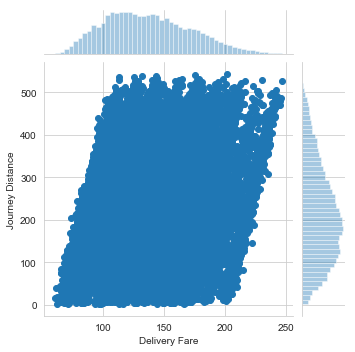

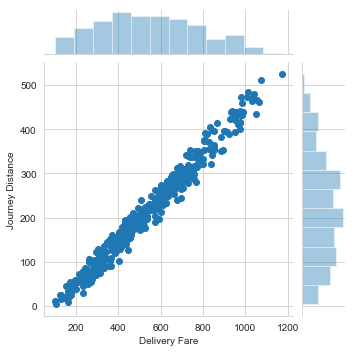

In [142]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "journey_distance",
    data = linear_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Journey Distance")

g = sns.jointplot(
    x = "delivery_fare",
    y = "journey_distance",
    data = non_linear_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Journey Distance")

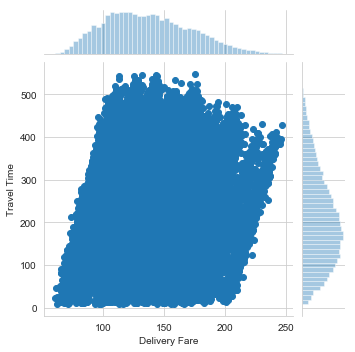

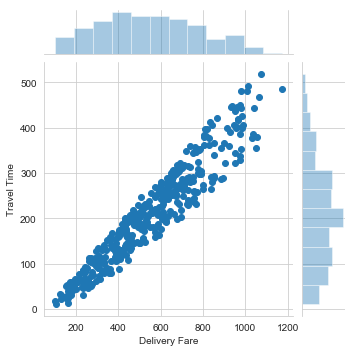

In [143]:
g = sns.jointplot(
    x = "delivery_fare",
    y = "travel_time",
    data = linear_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Travel Time")

g = sns.jointplot(
    x = "delivery_fare",
    y = "travel_time",
    data = non_linear_df,
    height = 5
)

_ = g.set_axis_labels("Delivery Fare", "Travel Time")

Checking the correlation coefficient values for all columns.

In [144]:
linear_df.corr()

drone_type  post_type  package_weight  origin_region  \
drone_type               1.000000   0.009875        0.000022       0.003671   
post_type                0.009875   1.000000        0.000641       0.003635   
package_weight           0.000022   0.000641        1.000000       0.000834   
origin_region            0.003671   0.003635        0.000834       1.000000   
destination_region       0.005593  -0.005677        0.000334      -0.002508   
origin_latitude          0.005333  -0.003054        0.006325       0.160302   
origin_longitude        -0.001538   0.002131       -0.006220       0.130283   
destination_latitude     0.001233   0.001865        0.000170       0.003491   
destination_longitude   -0.005517   0.004886        0.001842      -0.007442   
journey_distance        -0.003398   0.009109       -0.004702       0.006305   
travel_time             -0.158398   0.007484       -0.004627       0.005995   
delivery_fare            0.785281   0.434342        0.022608       0.008639   
day_period               0.007487   0.002201       -0.001981       0.004986   

                       destination_region  origin_latitude  origin_longitude  \
drone_type                       0.005593         0.005333         -0.001538   
post_type                       -0.005677        -0.003054          0.002131   
package_weight                   0.000334         0.006325         -0.006220   
origin_region                   -0.002508         0.160302          0.130283   
destination_region               1.000000         0.002129         -0.003190   
origin_latitude                  0.002129         1.000000         -0.017781   
origin_longitude                -0.003190        -0.017781          1.000000   
destination_latitude             0.160917        -0.005191          0.009979   
destination_longitude            0.119569         0.005567         -0.001151   
journey_distance                 0.004603         0.010515         -0.009516   
travel_time                      0.003270         0.009735         -0.009449   
delivery_fare                    0.002434         0.005242         -0.000525   
day_period                      -0.001929        -0.004079          0.007808   

                       destination_latitude  destination_longitude  \
drone_type                         0.001233              -0.005517   
post_type                          0.001865               0.004886   
package_weight                     0.000170               0.001842   
origin_region                      0.003491              -0.007442   
destination_region                 0.160917               0.119569   
origin_latitude                   -0.005191               0.005567   
origin_longitude                   0.009979              -0.001151   
destination_latitude               1.000000              -0.007161   
destination_longitude             -0.007161               1.000000   
journey_distance                   0.011567              -0.007517   
travel_time                        0.011260              -0.006633   
delivery_fare                      0.008364              -0.004392   
day_period                         0.010713              -0.000583   

                       journey_distance  travel_time  delivery_fare  \
drone_type                    -0.003398    -0.158398       0.785281   
post_type                      0.009109     0.007484       0.434342   
package_weight                -0.004702    -0.004627       0.022608   
origin_region                  0.006305     0.005995       0.008639   
destination_region             0.004603     0.003270       0.002434   
origin_latitude                0.010515     0.009735       0.005242   
origin_longitude              -0.009516    -0.009449      -0.000525   
destination_latitude           0.011567     0.011260       0.008364   
destination_longitude         -0.007517    -0.006633      -0.004392   
journey_distance               1.000000     0.984580       0.284412   
travel_time                    0.

Using columns with good correlation values, for this problem, the columns have been selected for correlation value > 0.25

Thus the colums selected are:
- drone_type
- post_type
- journey_distance
- day_period

Creating two dataframes from the original to emulate training and testing sets. Training set is created from those rows which have `delivery_fare` value present, and vice versa for testing set

In [145]:
use_cols = [
    "drone_type",
    "post_type",
    "journey_distance",
    "day_period",
    "delivery_fare"
]

In [146]:
linear_valid = linear_df[
    (linear_df.delivery_fare.isnull() == False)
][use_cols]

linear_invalid = linear_df[
    (linear_df.delivery_fare.isnull() == True)
][use_cols]

Performing some additional transformations on the structure of the data, before being undergone by analysis, such as:
- removal of `delivery_fare` column from the test set.
- Separating the target column from the training set.
- creating train, test splits from the training set and the target to check for MSE and $r^2$ values for the given model

In [147]:
linear_invalid.drop("delivery_fare", axis = 1, inplace = True)

In [148]:
delivery_fare = linear_valid.delivery_fare
linear_valid.drop("delivery_fare", axis = 1, inplace = True)

train_X, test_X, train_y, test_y = train_test_split(
    linear_valid, 
    delivery_fare, 
    test_size = 0.25
)

Using the LinearRegression Model since there are linear relations among the features and target vectors. To check for model performance, 2 metrics have been used:
- MSE (Mean Squared Error) - Lower the better 
- $r^2$ ($r^2$ score value) - Value between 0 and 1, higher the better

In [149]:
lm_linear = LinearRegression()
lm_linear.fit(train_X, train_y)
pred_delivery_fare = lm_linear.predict(test_X)

In [150]:
mean_squared_error(test_y, pred_delivery_fare)

10.870742799368792

In [151]:
r2_score(test_y, pred_delivery_fare)

0.9908746680998127

Low MSE values and high $r^2$ value validates the selection of columns and model used for imputing values of `delivery_fare`

In [152]:
lm_linear.fit(
    linear_valid, 
    delivery_fare
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predicting the missing values for the `NA` values in `delivery_fare`

In [153]:
linear_invalid["delivery_fare"] = lm_linear.predict(linear_invalid)

Addind the removed column of `delivery_fare` from the train set to maintain the shape of the original dataframe

In [154]:
linear_valid["delivery_fare"] = delivery_fare

Combining the not-null and null `delivery_fare` dataframes.

In [155]:
linear_df[
    use_cols
] = linear_valid.combine_first(linear_invalid)

Combining the two dataframes separated based on `package_weight` to construct back the original dataframe.

In [156]:
drone_df = linear_df.combine_first(non_linear_df)

In [157]:
drone_df.isnull().sum()

id                       0
drone_type               0
post_type                0
package_weight           0
origin_region            0
destination_region       0
origin_latitude          0
origin_longitude         0
destination_latitude     0
destination_longitude    0
journey_distance         0
departure_date           0
departure_time           0
travel_time              0
delivery_time            0
delivery_fare            0
day_period               0
dtype: int64

Dropping additional columns created for analysis

In [158]:
drone_df.drop("day_period", axis = 1, inplace = True)

## 9. Fixing additional errors

__Additional Errors after observing the csv__
1. Package Weight Precision upto 3 decimal places
2. Latitude and Longitude upto 7 decimal places for both origin and destination

In [159]:
drone_df.package_weight = drone_df.package_weight.apply(lambda x: round(x, 3))
drone_df.origin_latitude = drone_df.origin_latitude.apply(lambda x: round(x, 7))
drone_df.origin_longitude = drone_df.origin_longitude.apply(lambda x: round(x, 7))
drone_df.destination_latitude = drone_df.destination_latitude.apply(lambda x: round(x, 7))
drone_df.destination_longitude = drone_df.destination_longitude.apply(lambda x: round(x, 7))